# Check Data

In [5]:
# Check if all files in the data folder
import os
import re

data_folder = '..\\data\\raw'
years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for year in years:
    for month in months:
        filename = f'{month}_{year}.csv'
        if not os.path.exists(os.path.join(data_folder, filename)):
            print(f'{filename} not found in {year}')



November_2024.csv not found in 2024
December_2024.csv not found in 2024


# Loading Data


In [10]:
df_test = pd.read_csv('../data/raw/January_2024.csv')
df_test_2 = pd.read_csv('../data/raw/February_2024.csv')

# Get the column names of both dataframes
columns_test = set(df_test.columns)
columns_test_2 = set(df_test_2.columns)

# Identify columns that are different
columns_only_in_test = columns_test - columns_test_2
columns_only_in_test_2 = columns_test_2 - columns_test

# Display the results
{
    "Columns only in January_2024": list(columns_only_in_test),
    "Columns only in February_2024": list(columns_only_in_test_2)
}



{'Columns only in January_2024': [],
 'Columns only in February_2024': ['I-Hub 892 Bourke Street',
  '516 Elizabeth St',
  '512 Elizabeth St',
  '514 Elizabeth St',
  '510 Elizabeth St']}

In [15]:
import os
import pandas as pd

# Initialize a dictionary to store data information
file_data = {}

data_folder = '..\\data\\raw'
years = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Dictionary to store the data
all_data = []
column_appearance_count = {}
missing_data_summary = {}

# Load all datasets
for year in years:
    for month in months:
        filename = f'{month}_{year}.csv'
        file_path = os.path.join(data_folder, filename)
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                all_data.append((filename, year, df))
                
                # Count column appearances
                for col in df.columns:
                    column_appearance_count[col] = column_appearance_count.get(col, 0) + 1
                
                # Track missing data per year per column
                if year not in missing_data_summary:
                    missing_data_summary[year] = {}
                
                for col in df.columns:
                    missing_data_summary[year][col] = missing_data_summary[year].get(col, 0) + df[col].isna().sum()
            
            except Exception as e:
                print(f"Error loading {filename}: {e}")
        else:
            print(f'{filename} not found in {year}')

# Summary of all columns and their appearance counts
columns_df = pd.DataFrame({
    "Column Name": column_appearance_count.keys(),
    "Appearance Count": column_appearance_count.values()
})

# Summary of missing data per year
missing_data_avg = {
    col: {year: missing_data_summary[year].get(col, 0) / 12 for year in missing_data_summary}
    for col in column_appearance_count
}

# Create DataFrame for missing data averages
missing_data_df = pd.DataFrame(missing_data_avg).T
missing_data_df.columns = [f"Avg Missing {year}" for year in missing_data_summary.keys()]

# Combine summaries
columns_summary = pd.concat([columns_df.set_index("Column Name"), missing_data_df], axis=1)

columns_summary

November_2024.csv not found in 2024
December_2024.csv not found in 2024


Appearance Count  \
Date                                                         142   
Hour                                                         142   
State Library                                                142   
Collins Place (South)                                        142   
Collins Place (North)                                        142   
...                                                          ...   
I-Hub Corner of King Street and Latrobe Street                 1   
I-Hub 489 Elizabeth Street                                     1   
I-Hub 526 La Trobe Street                                      1   
475 Spencer Street                                             1   
484 Spencer Street                                             1   

                                                Avg Missing 2013  \
Date                                                    0.000000   
Hour                                                    0.000000   
State Library                                         214.083333   
Collins Place (South)                                   0.083333   
Collins Place (North)                                   0.083333   
...                                                          ...   
I-Hub Corner of King Street and Latrobe Street          0.000000   
I-Hub 489 Elizabeth Street                              0.000000   
I-Hub 526 La Trobe Street                               0.000000   
475 Spencer Street                                      0.000000   
484 Spencer Street                                      0.000000   

                                                Avg Missing 2014  \
Date                                                         0.0   
Hour                                                         0.0   
State Library                                                0.0   
Collins Place (South)                                        0.0   
Collins Place (North)                                        0.0   
...                                                          ...   
I-Hub Corner of King Street and Latrobe Street               0.0   
I-Hub 489 Elizabeth Street                                   0.0   
I-Hub 526 La Trobe Street                                    0.0   
475 Spencer Street                                           0.0   
484 Spencer Street                                           0.0   

                                                Avg Missing 2015  \
Date                                                         0.0   
Hour                                                         0.0   
State Library                                                0.0   
Collins Place (South)                                        0.0   
Collins Place (North)                                        0.0   
...                                                          ...   
I-Hub Corner of King Street and Latrobe Street               0.0   
I-Hub 489 Elizabeth Street                                   0.0   
I-Hub 526 La Trobe Street                                    0.0   
475 Spencer Street                                           0.0   
484 Spencer Street                                           0.0   

                                                Avg Missing 2016  \
Date                                                         0.0   
Hour                                                         0.0   
State Library                                                0.0   
Collins Place (South)                                        0.0   
Collins Place (North)                                        0.0   
...                                                          ...   
I-Hub Corner of King Street and Latrobe Street               0.0   
I-Hub 489 Elizabeth Street                                   0.0   
I-Hub 526 La Trobe Street                                    0.0   
475 Spencer Street                                           0.0   
484 Spencer Street              

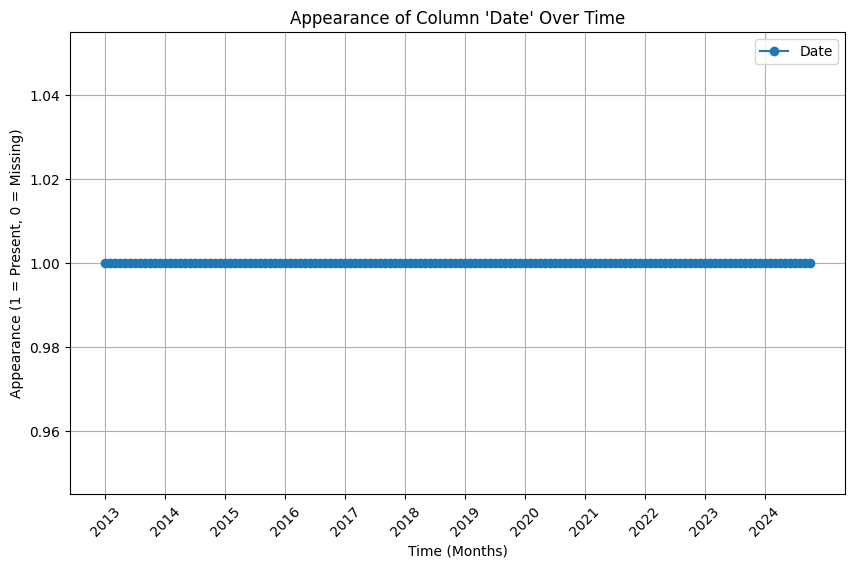

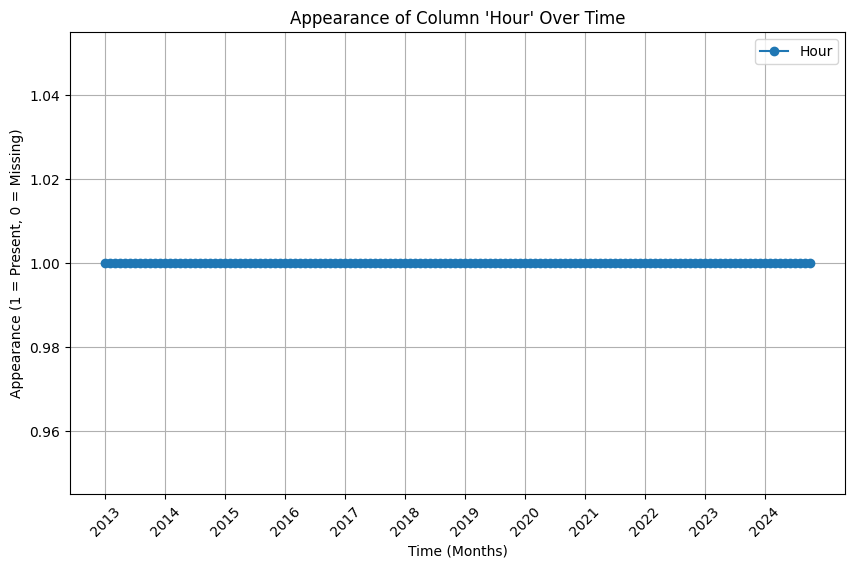

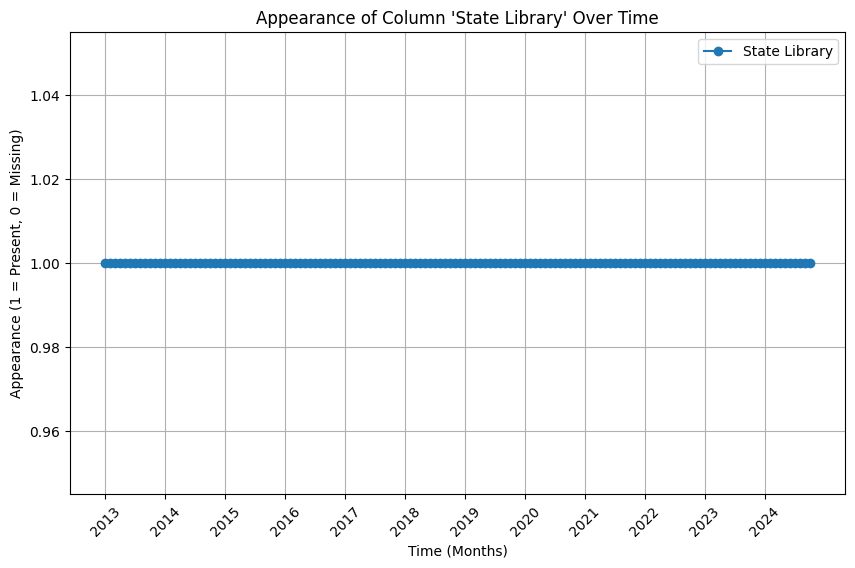

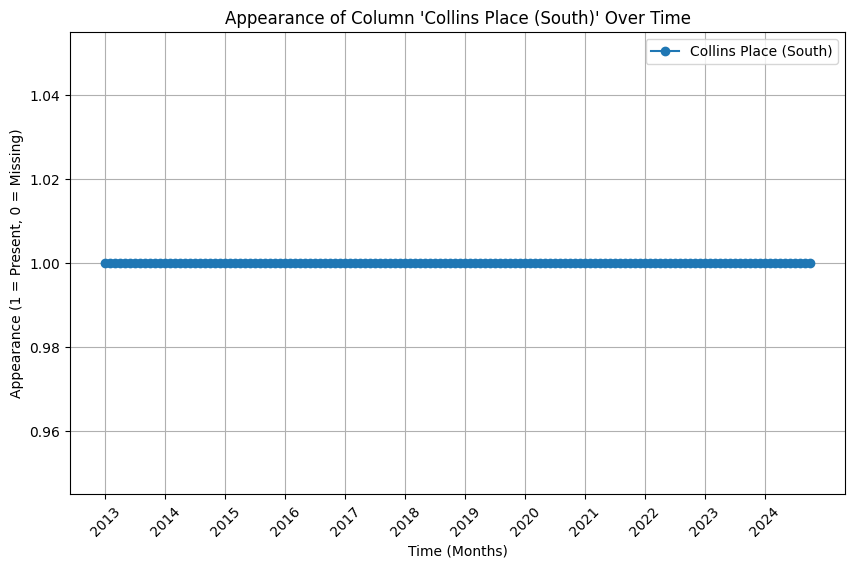

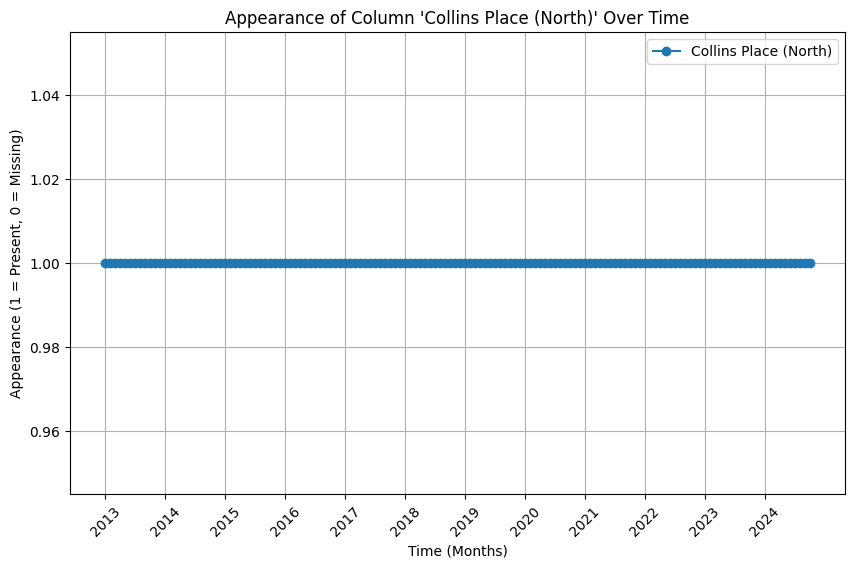

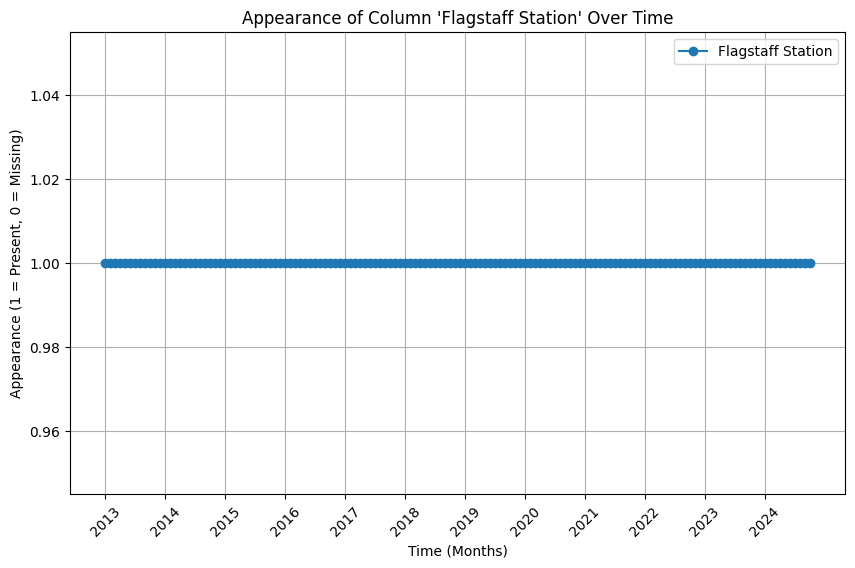

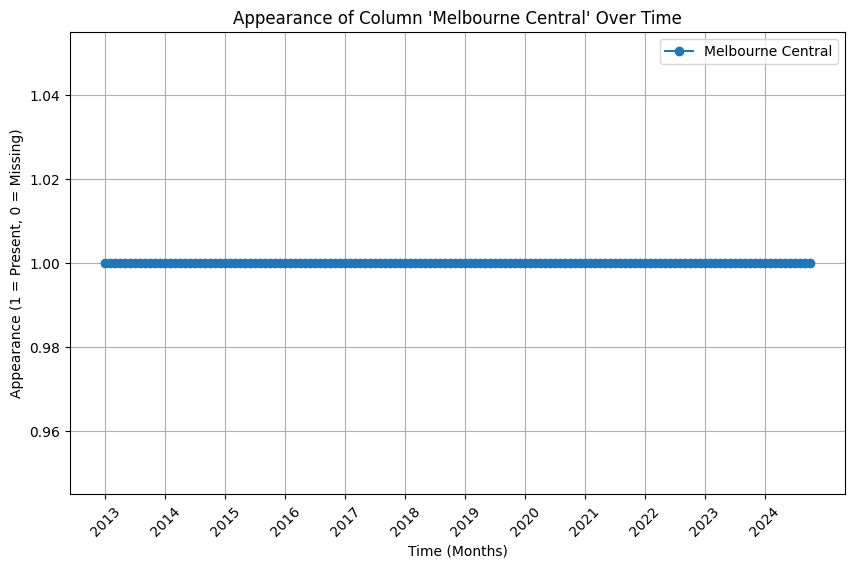

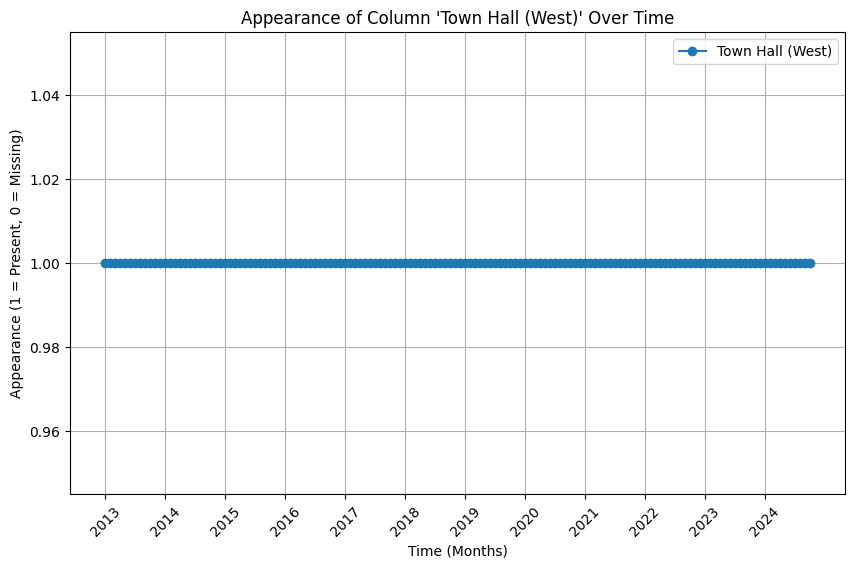

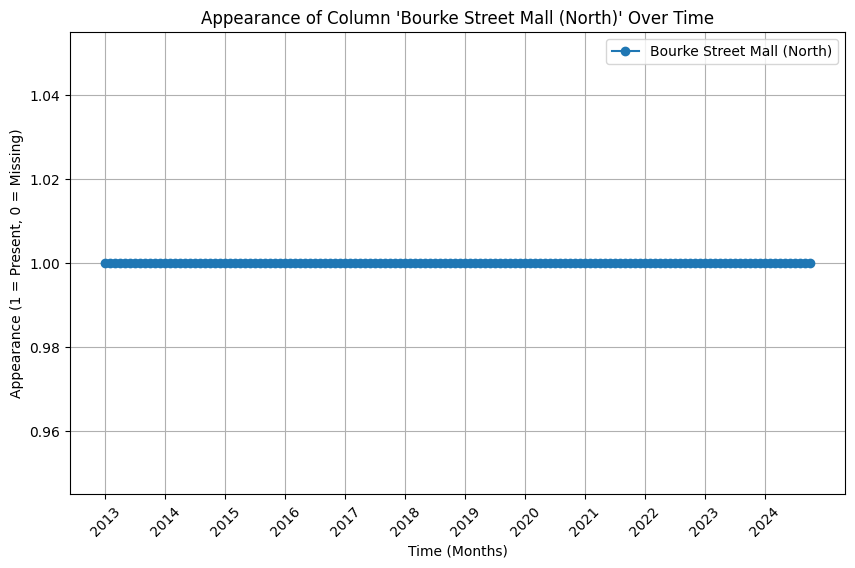

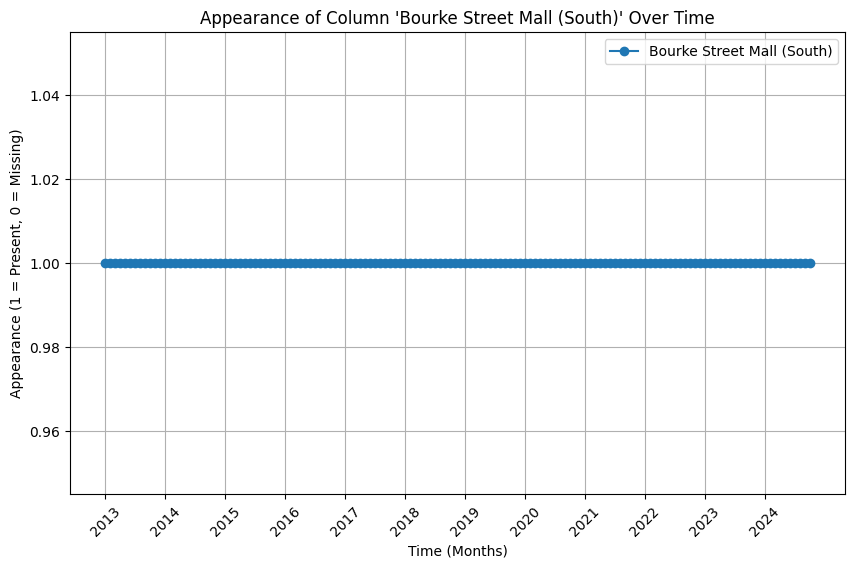

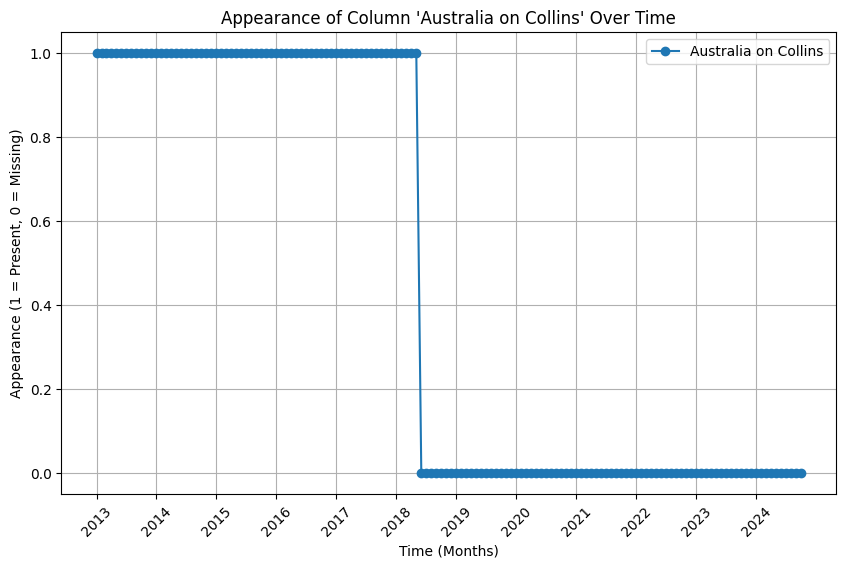

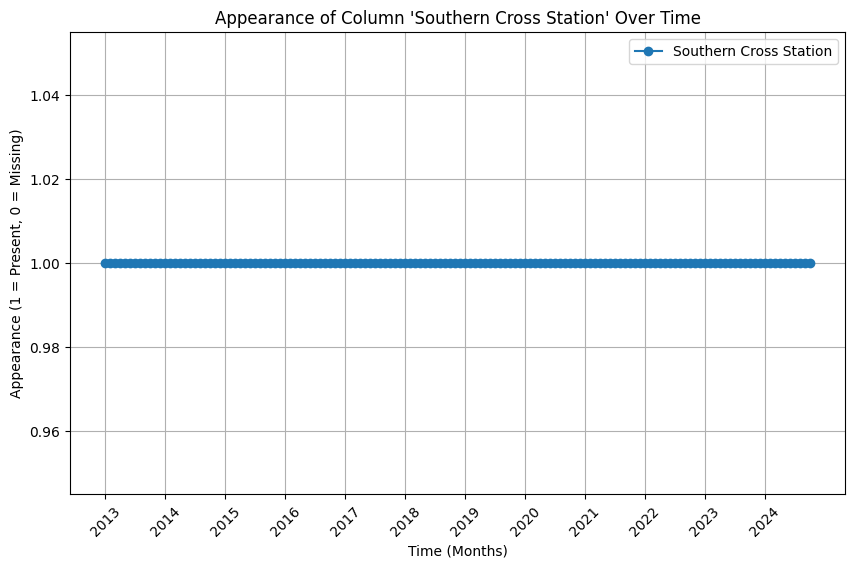

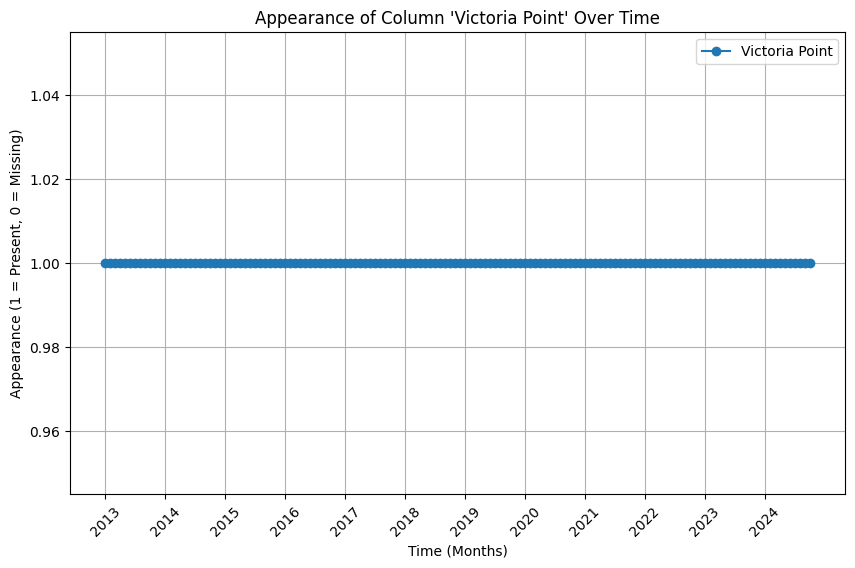

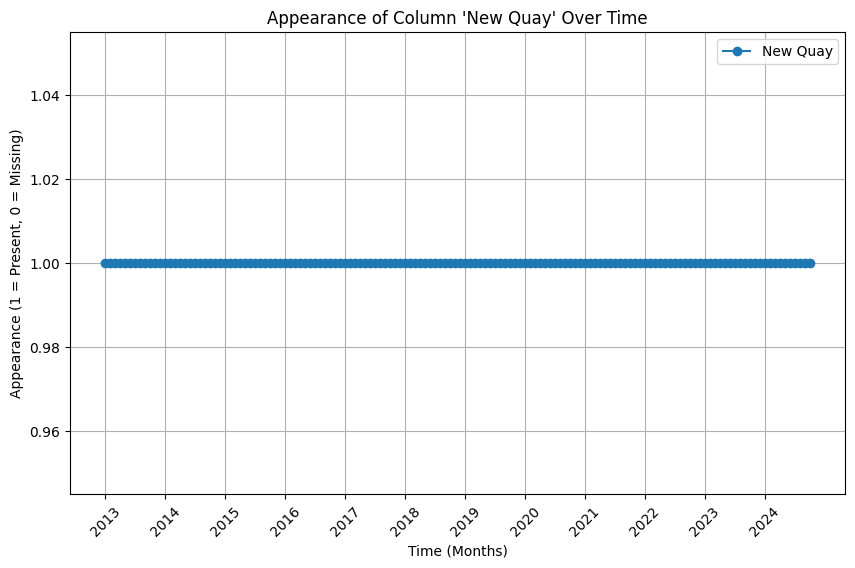

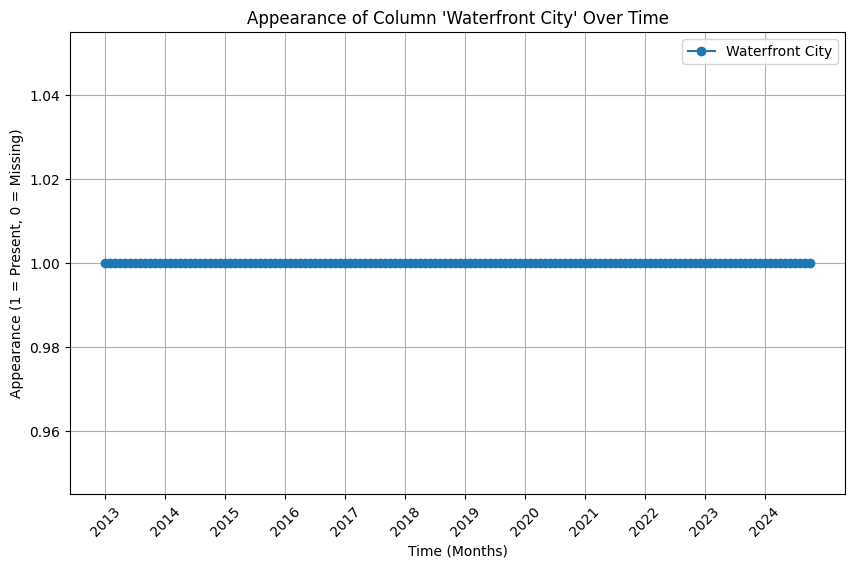

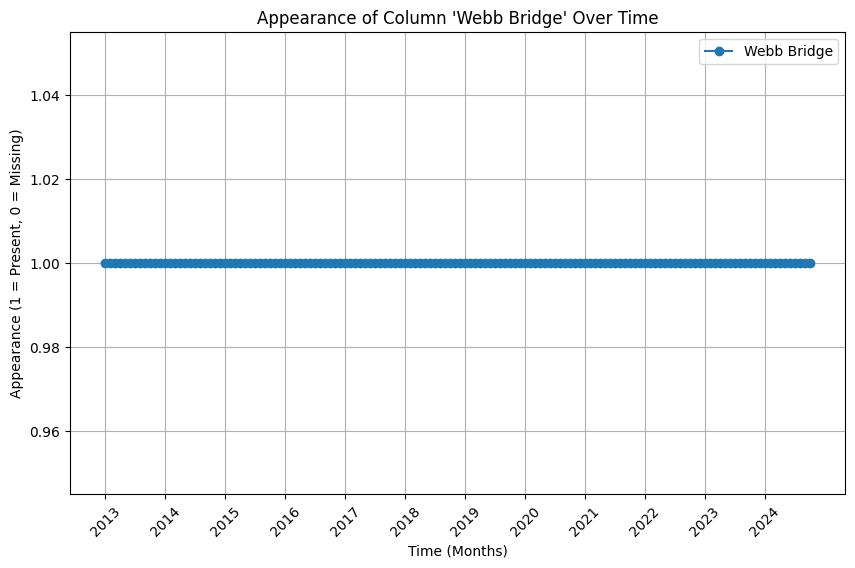

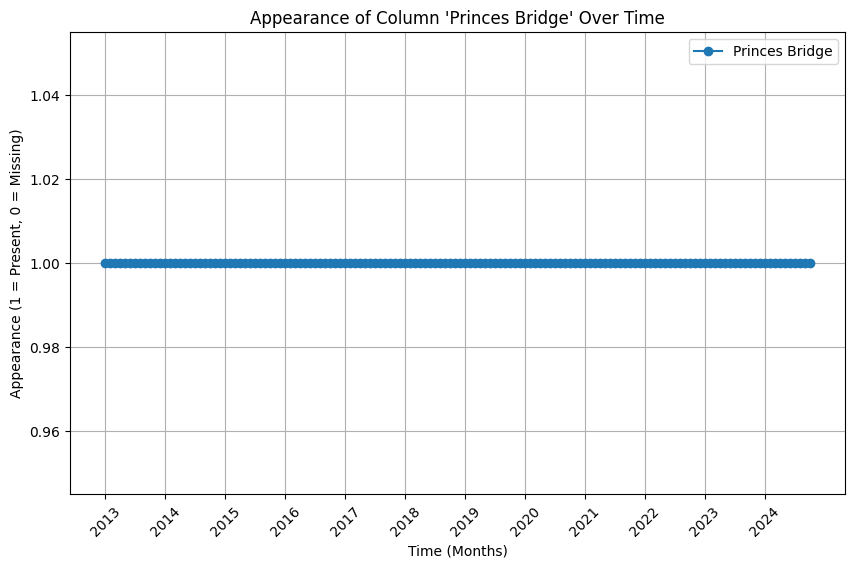

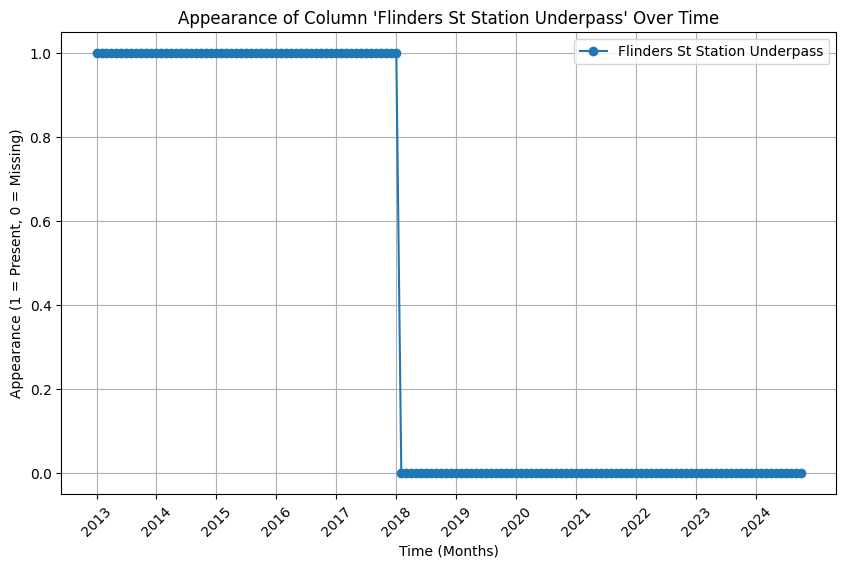

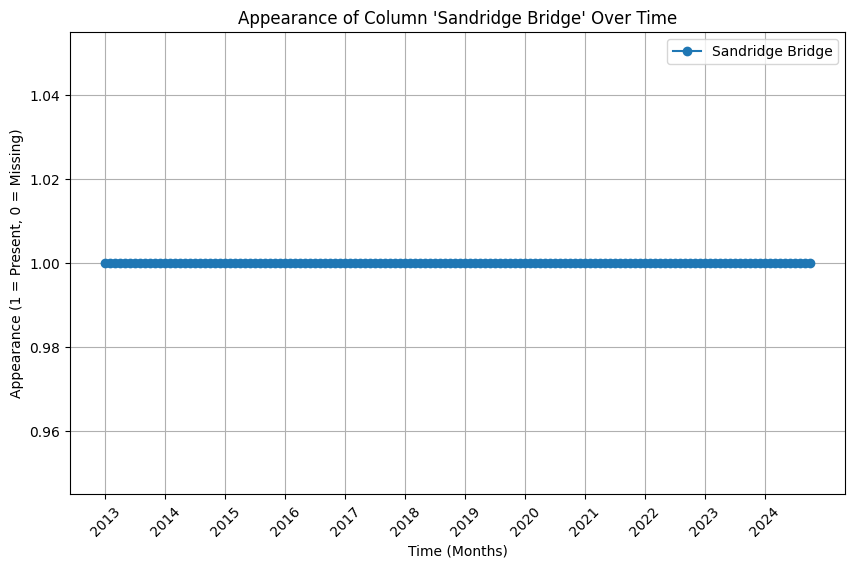

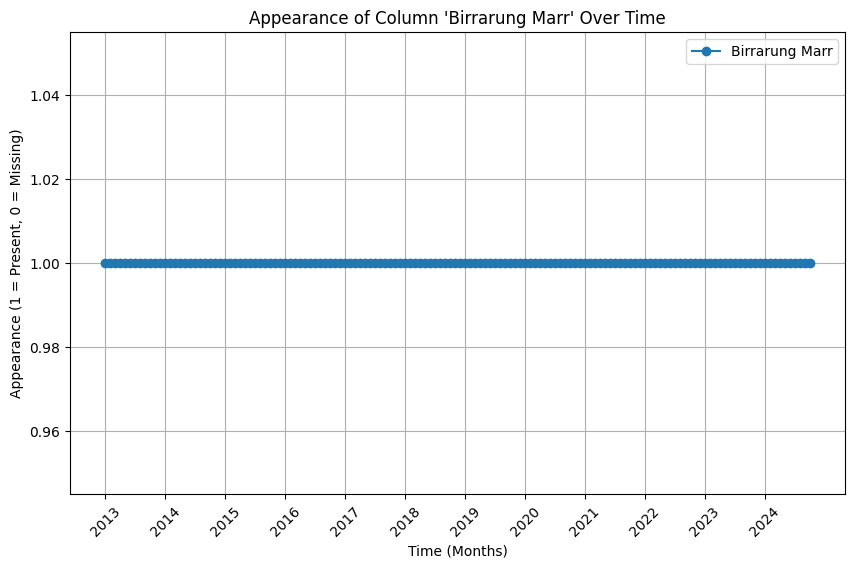

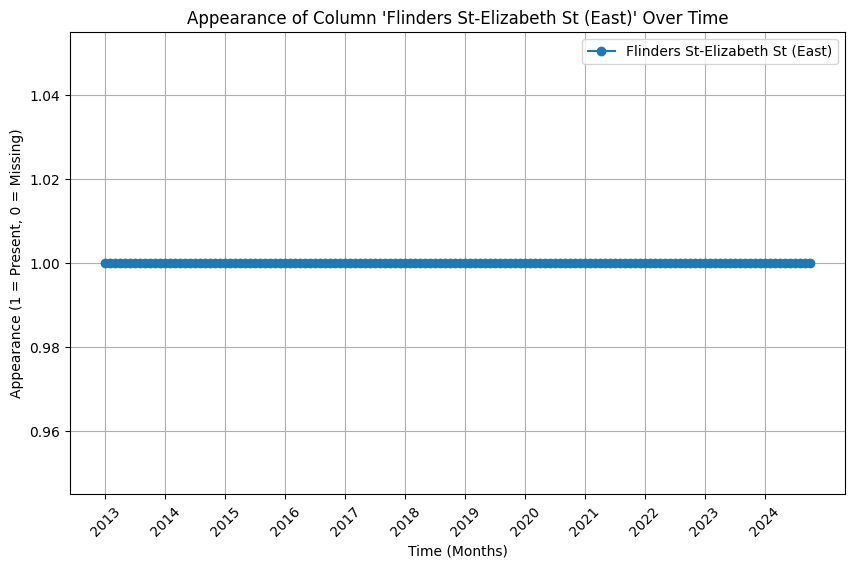

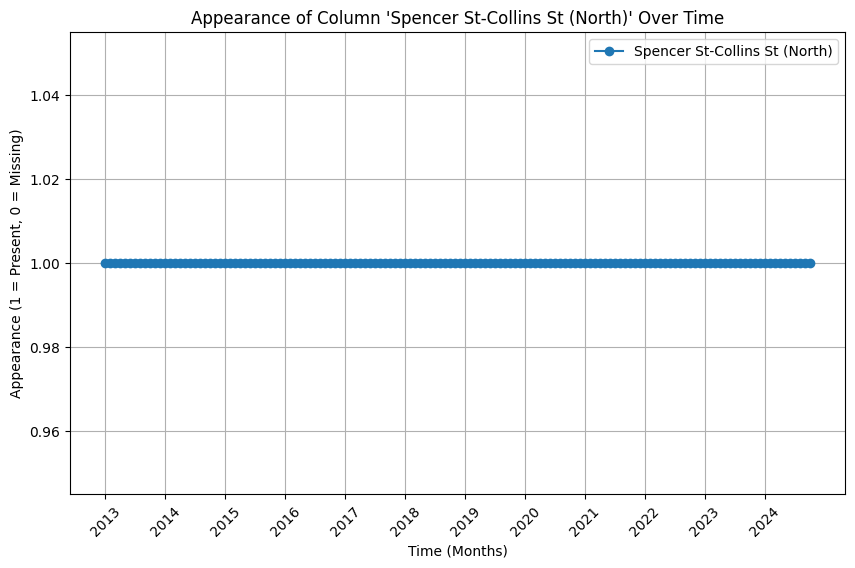

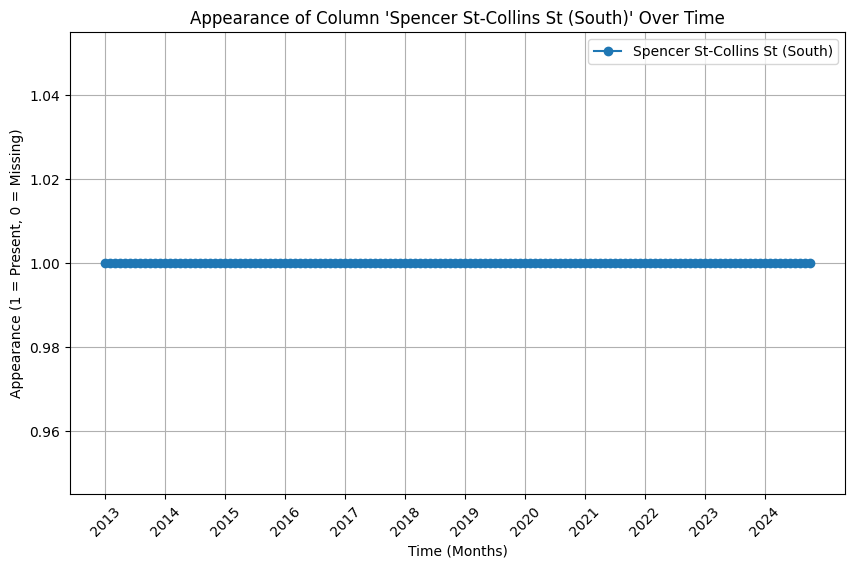

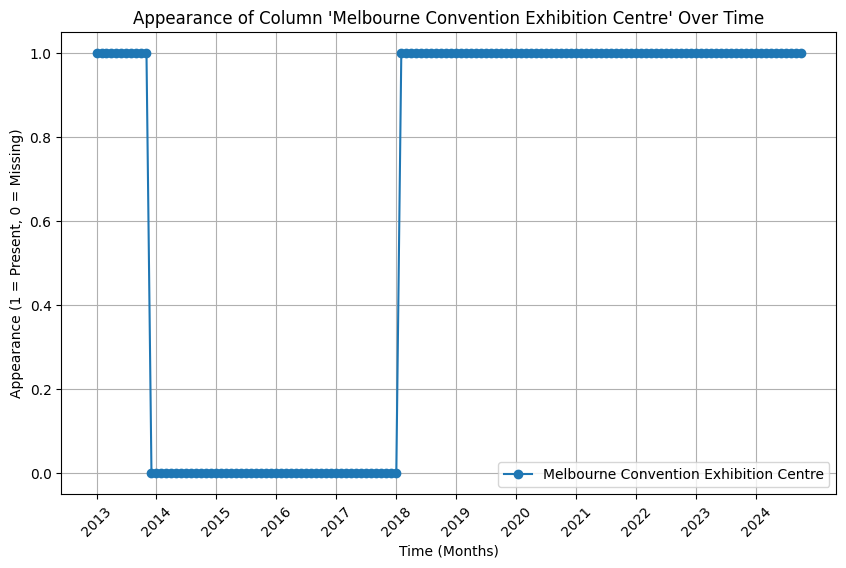

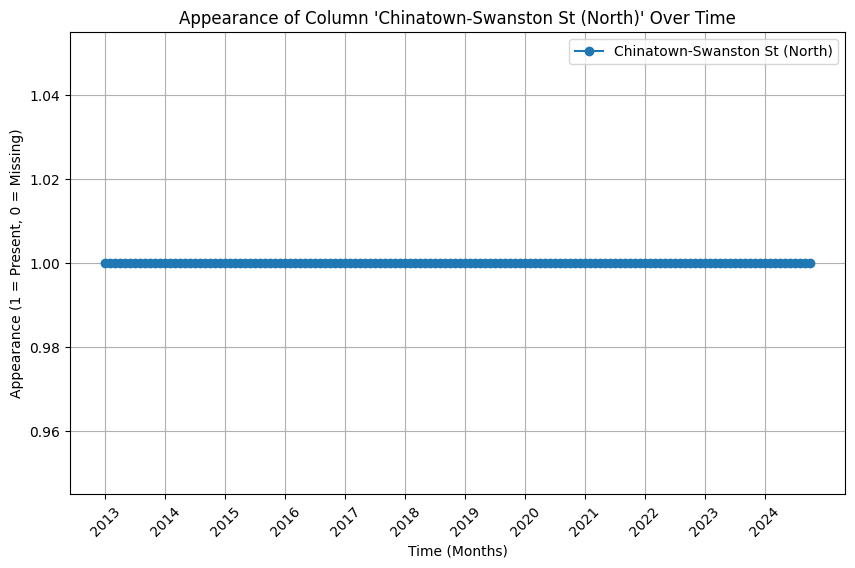

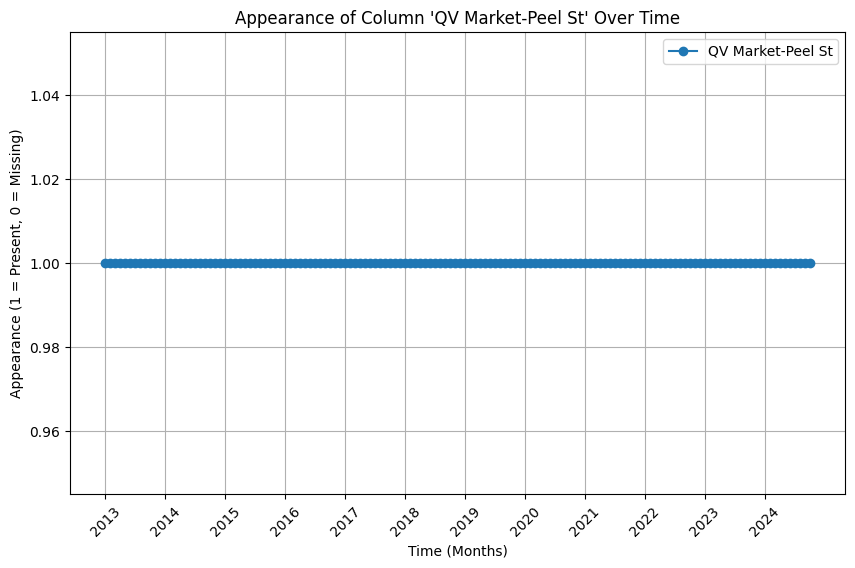

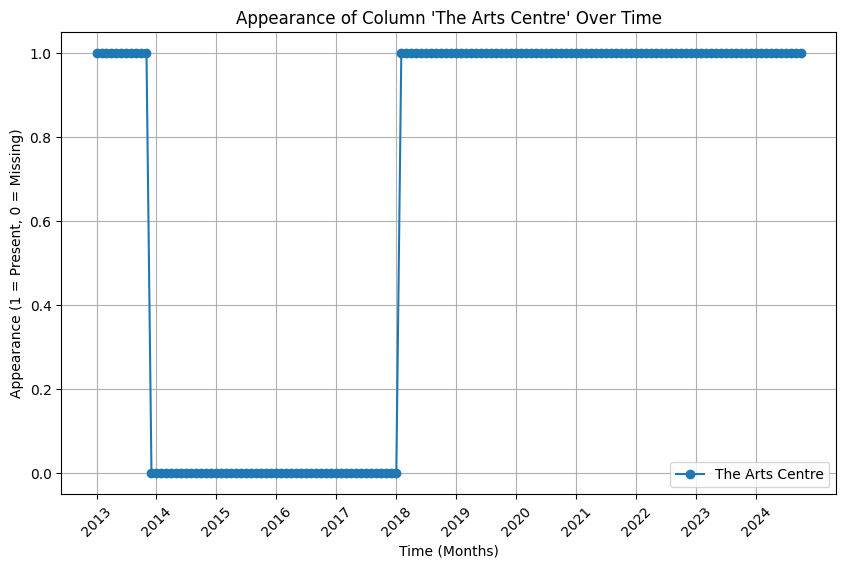

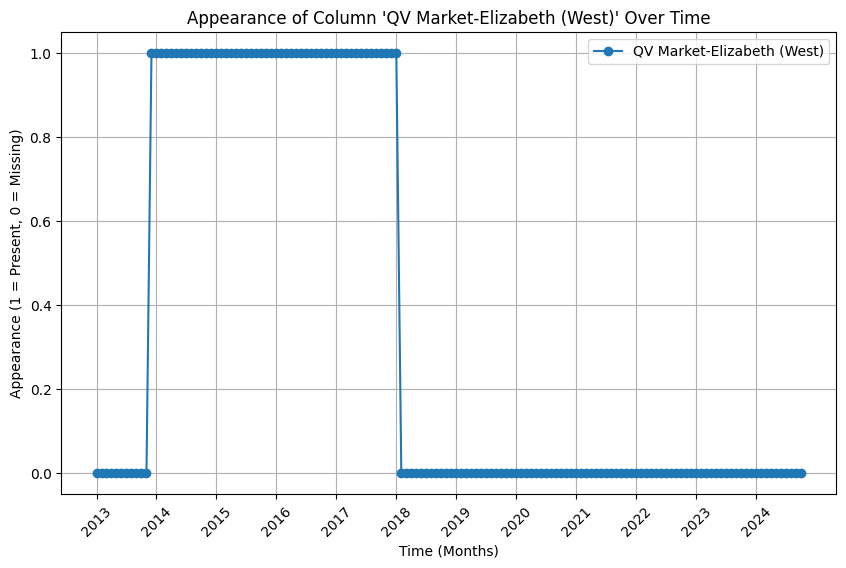

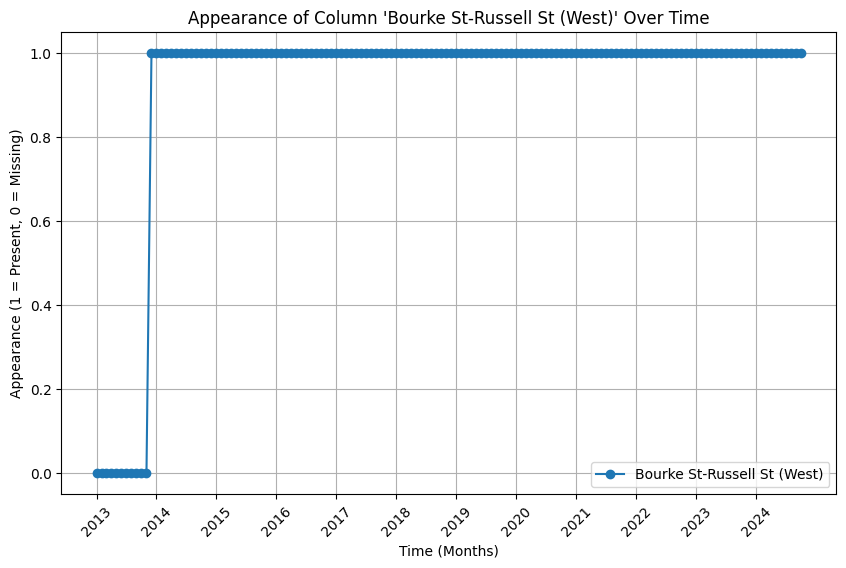

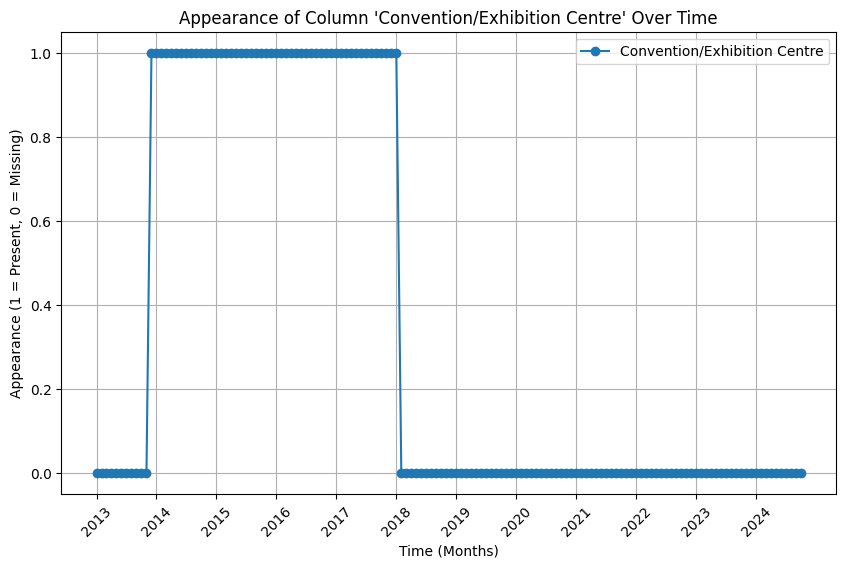

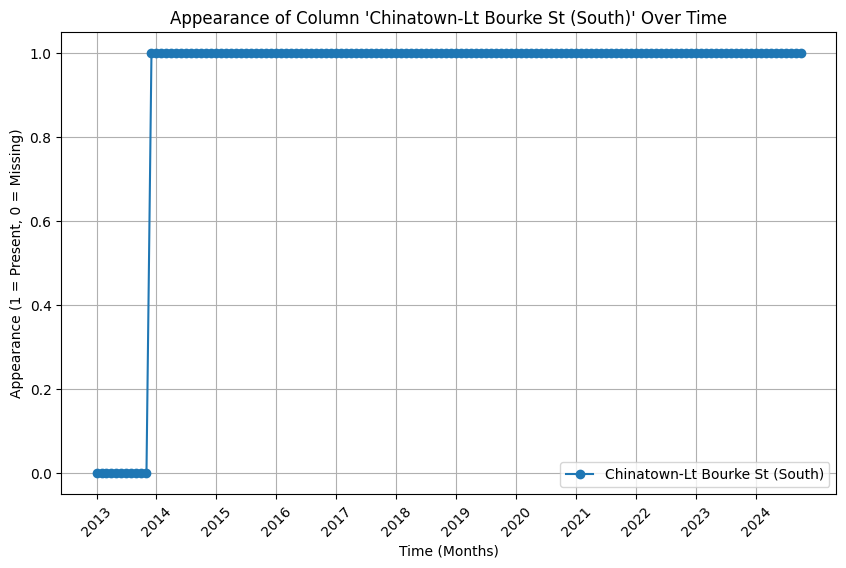

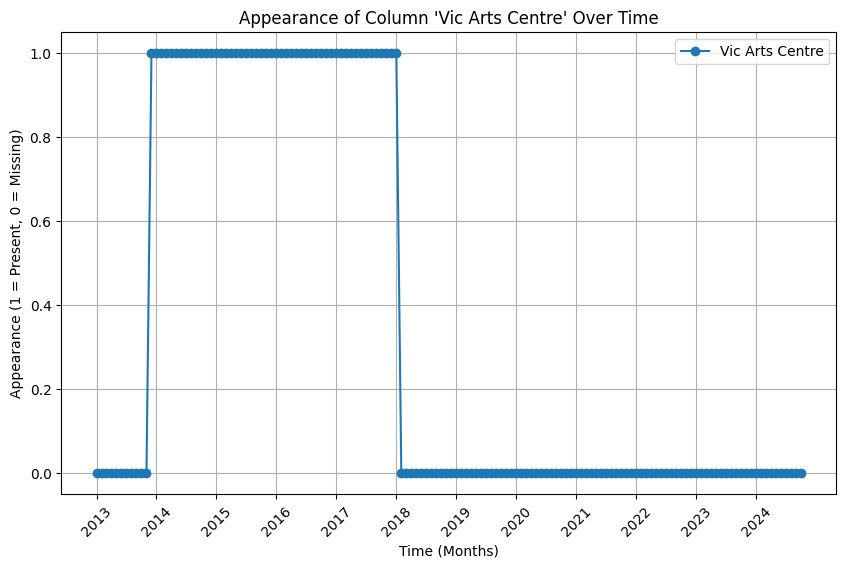

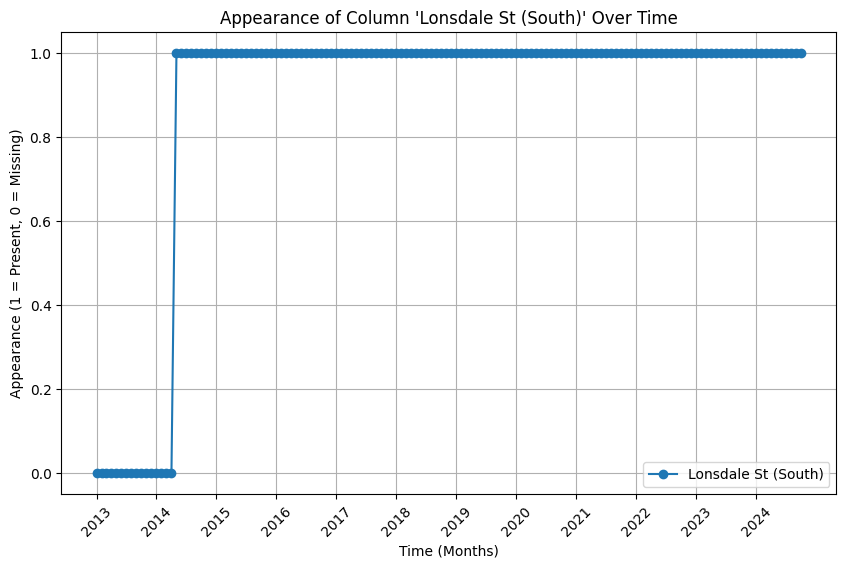

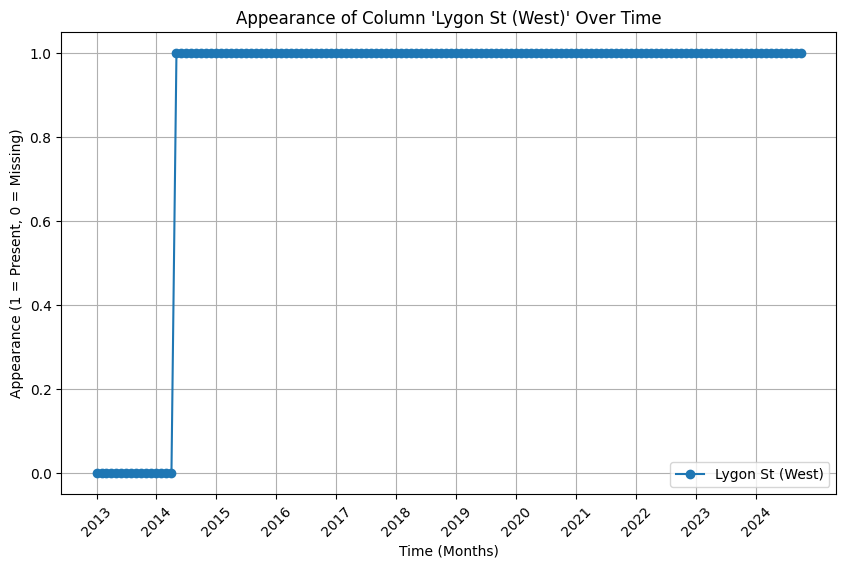

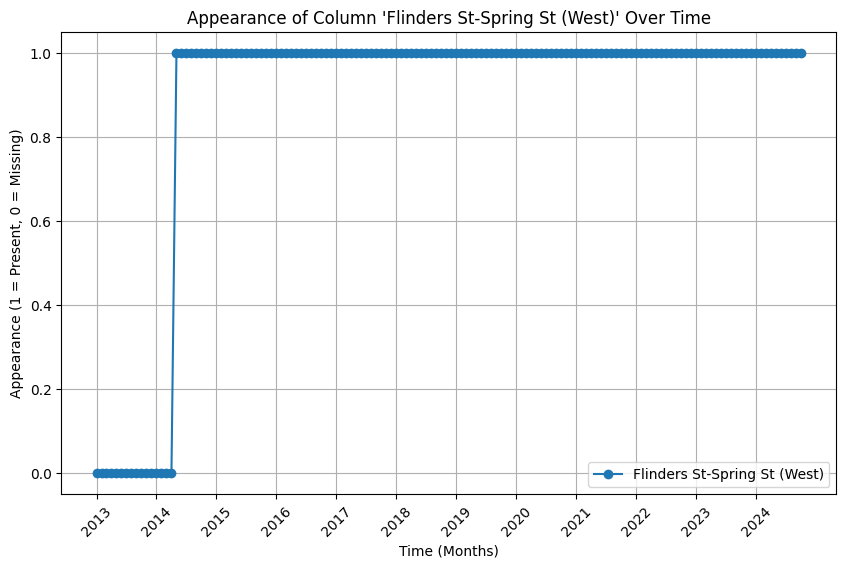

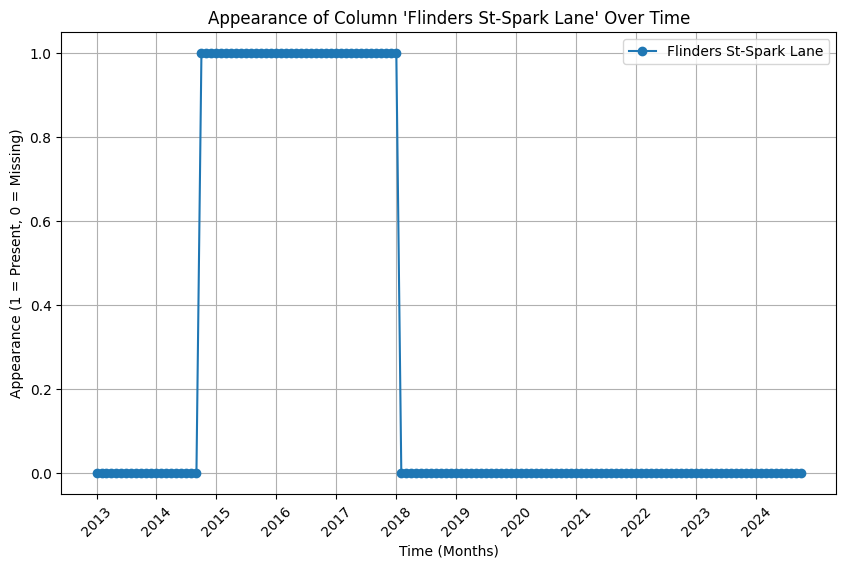

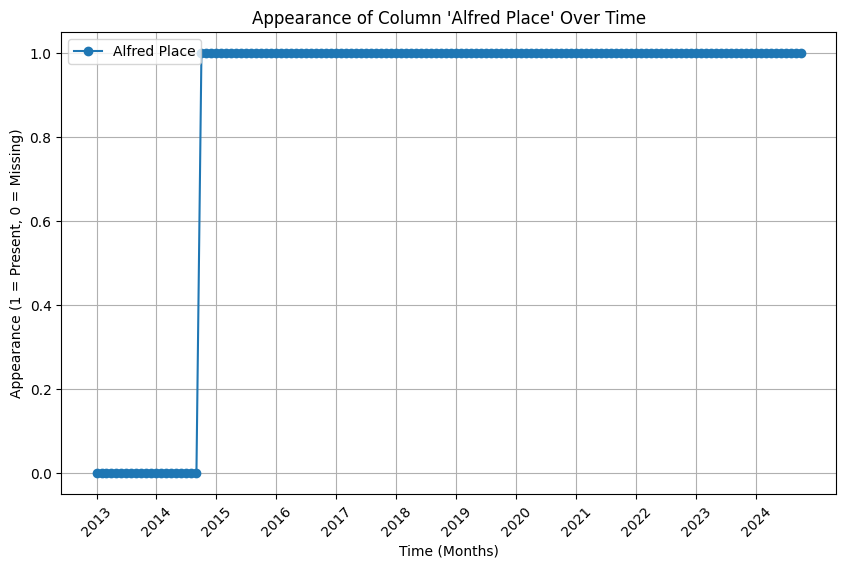

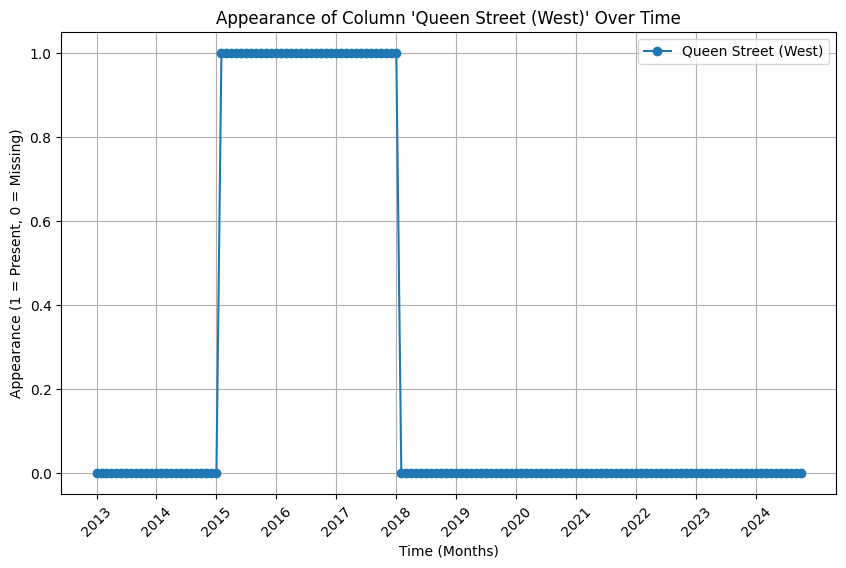

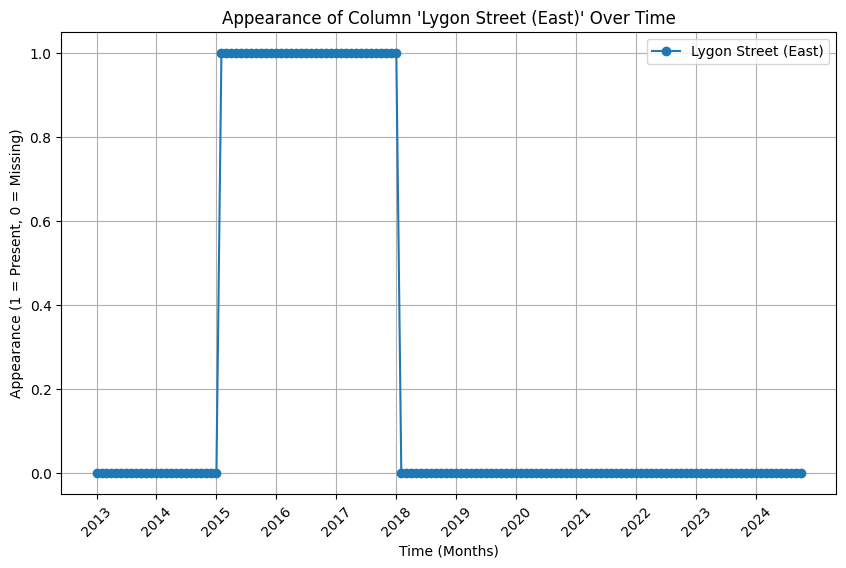

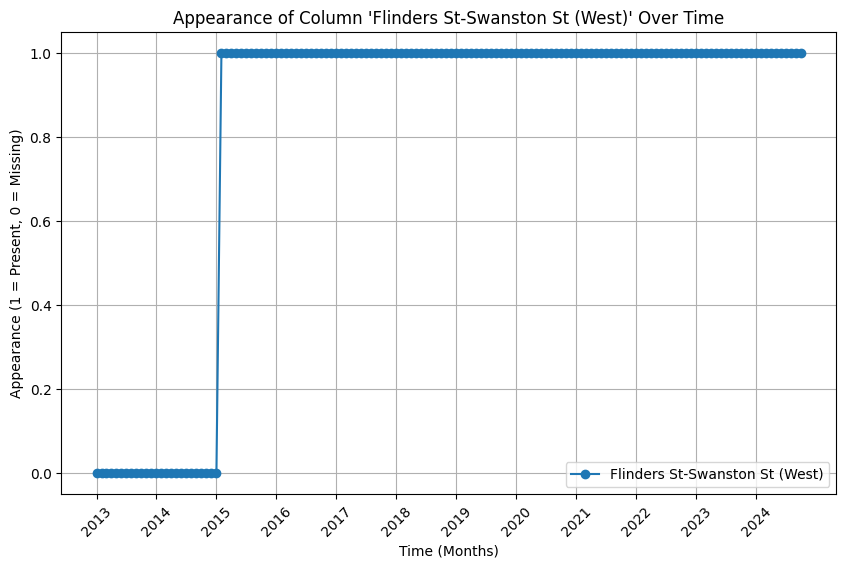

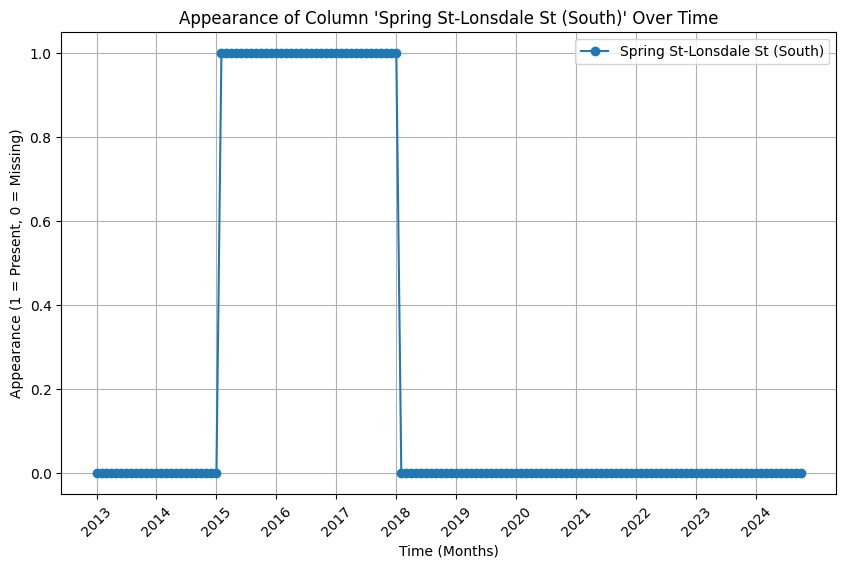

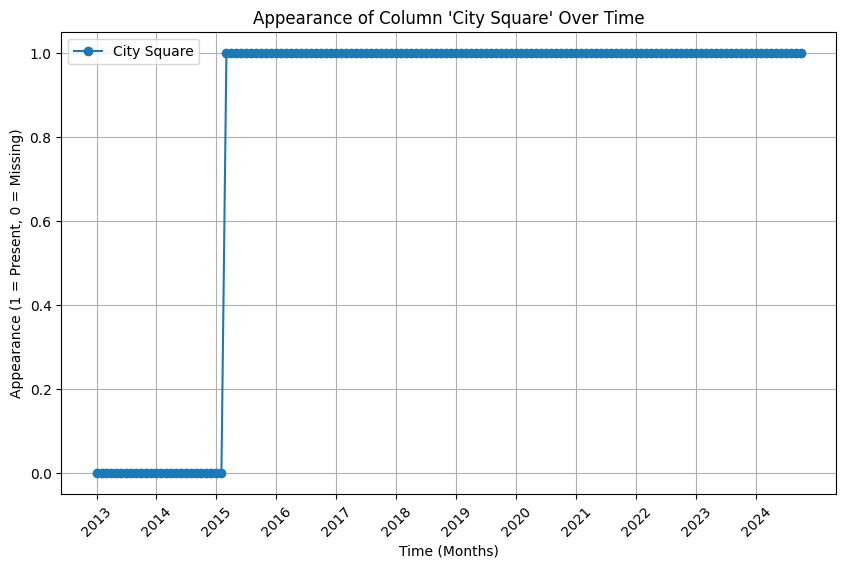

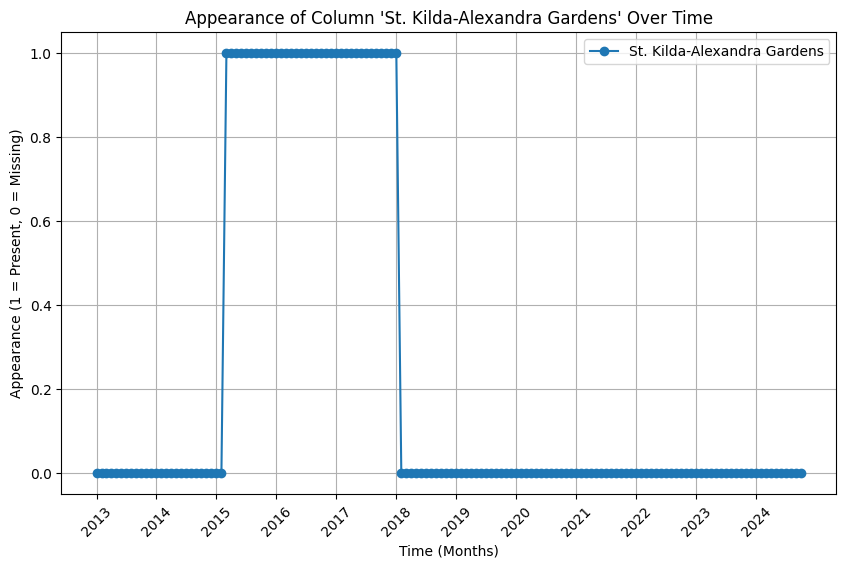

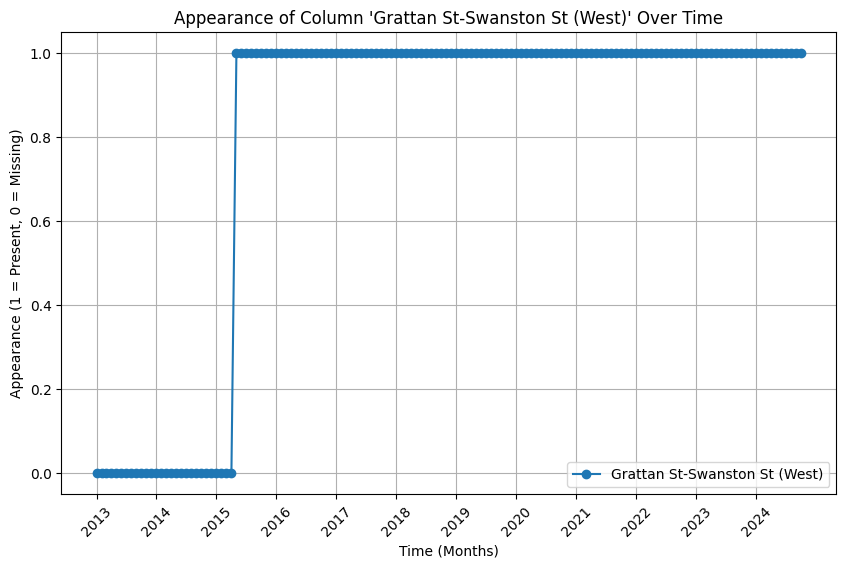

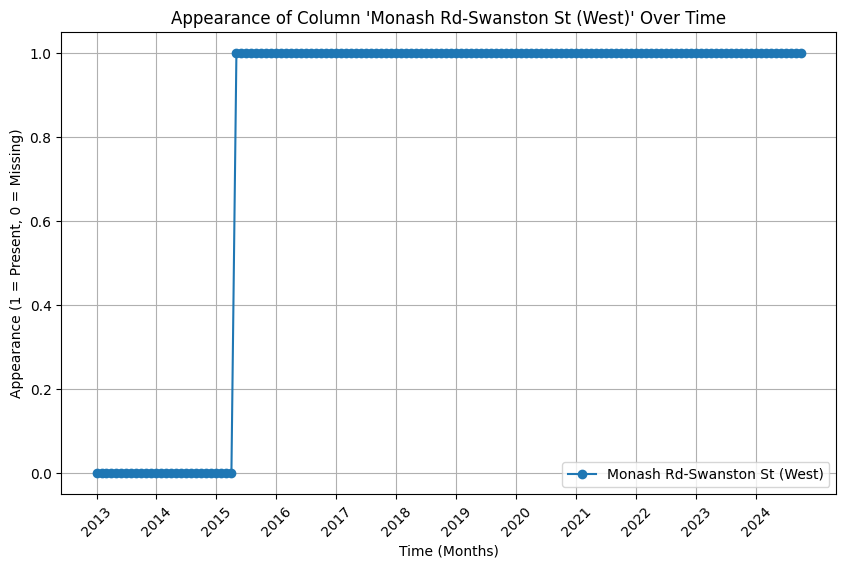

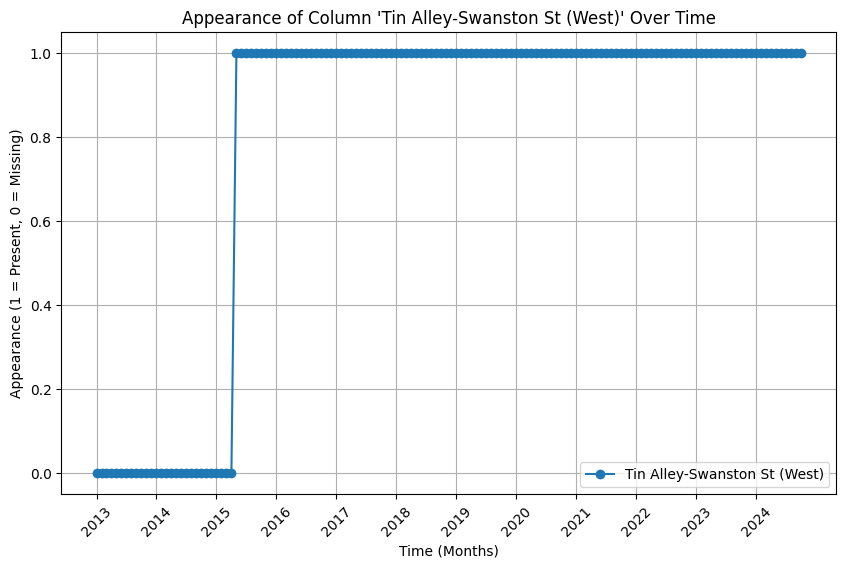

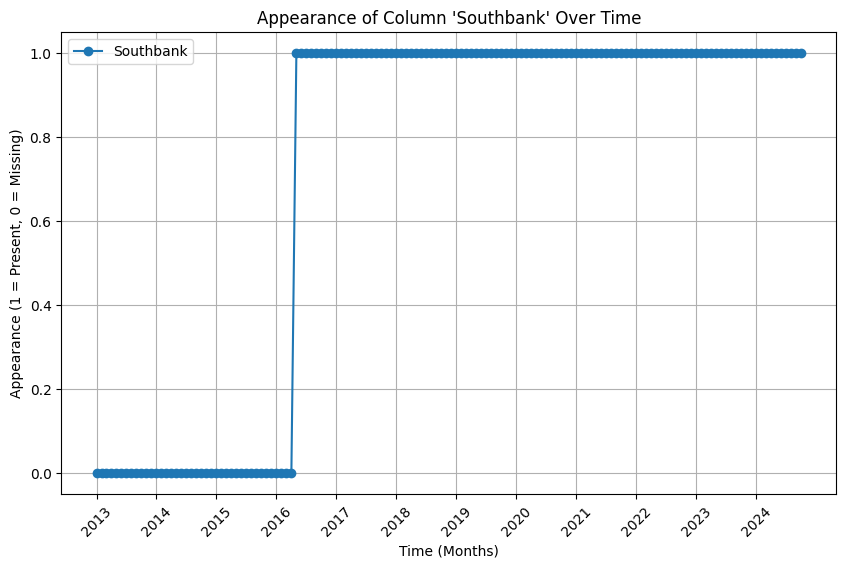

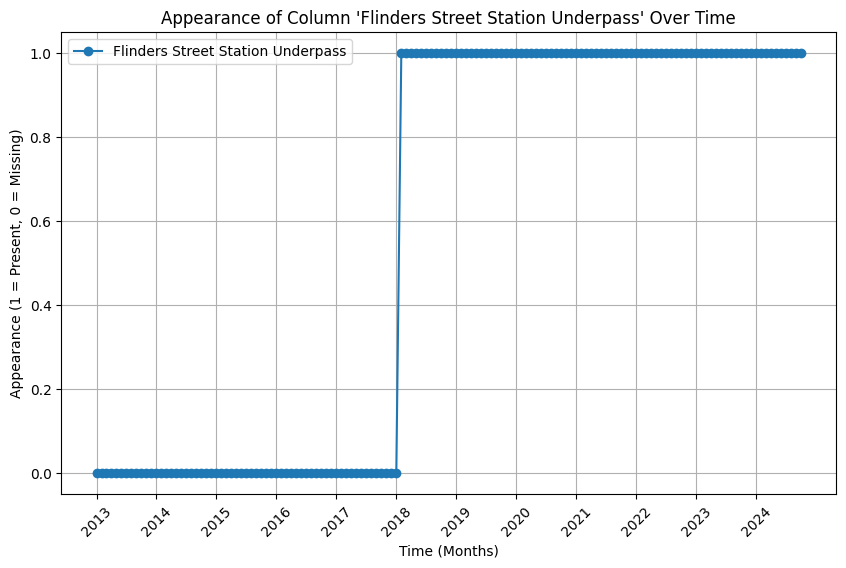

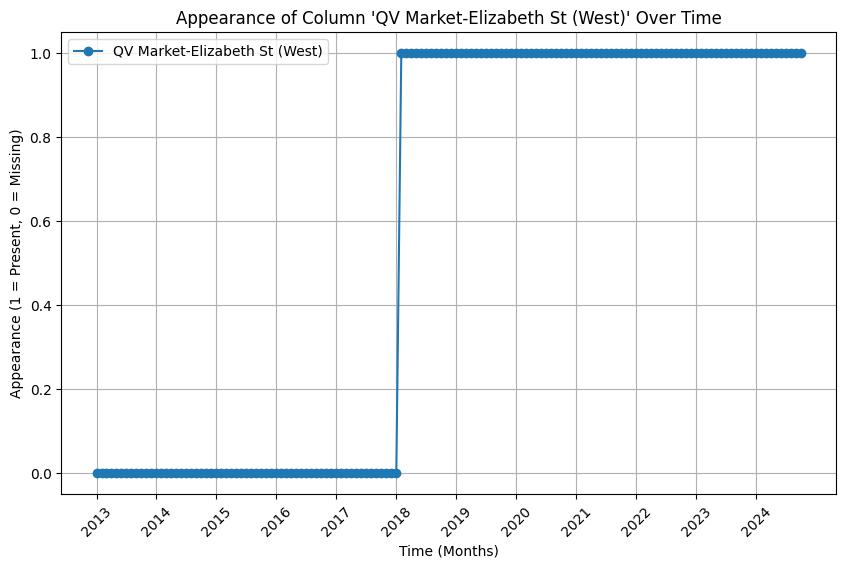

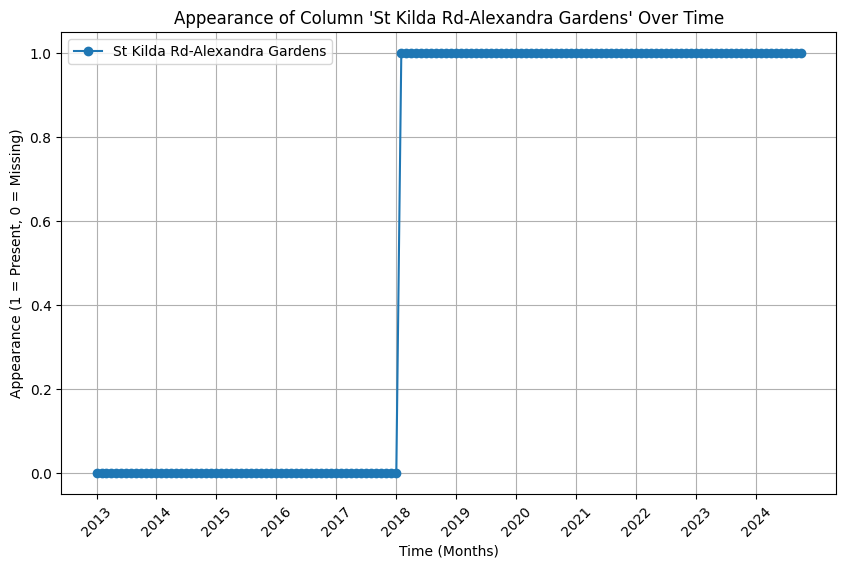

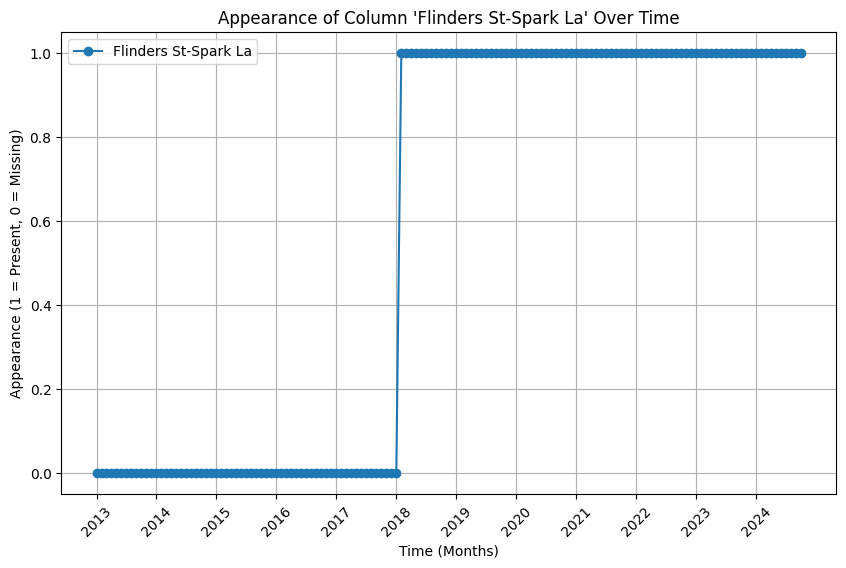

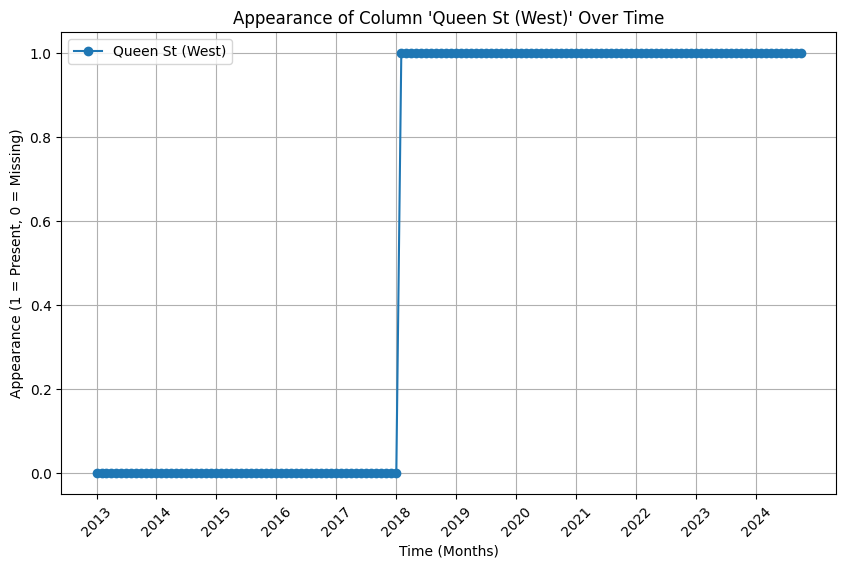

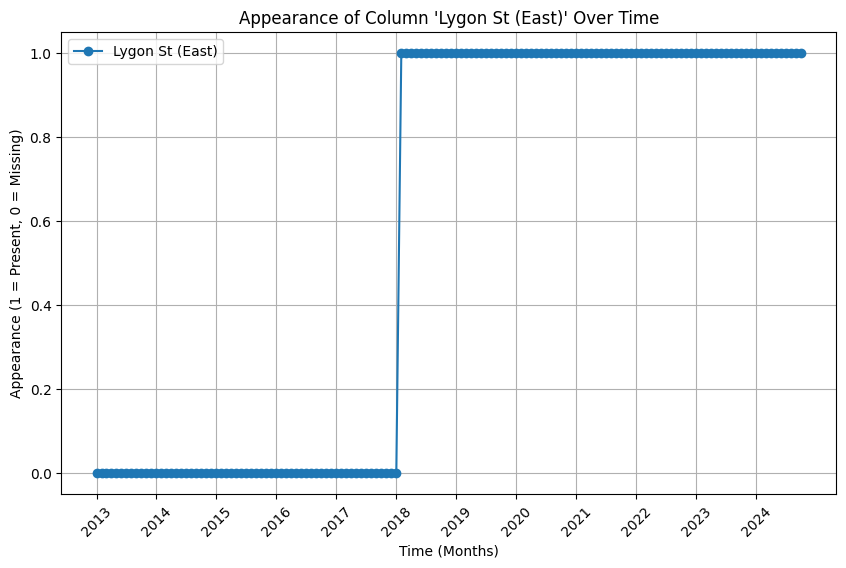

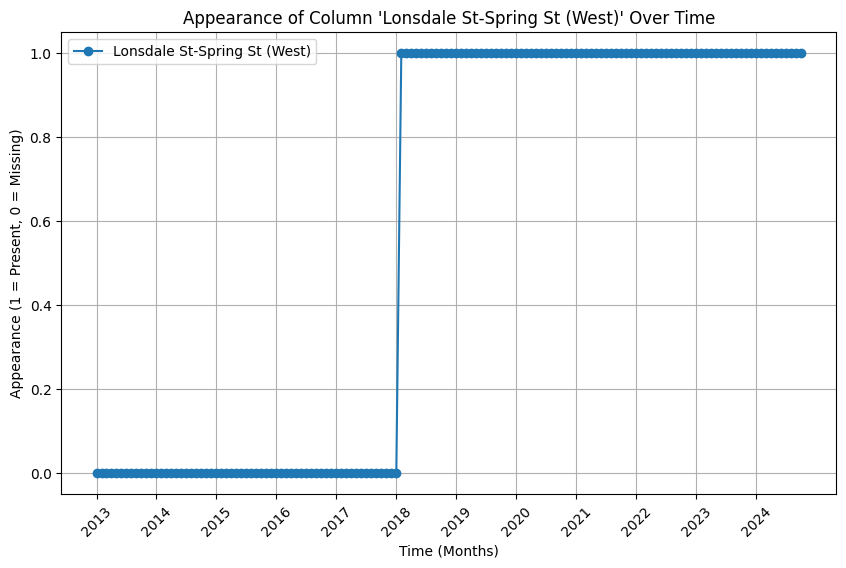

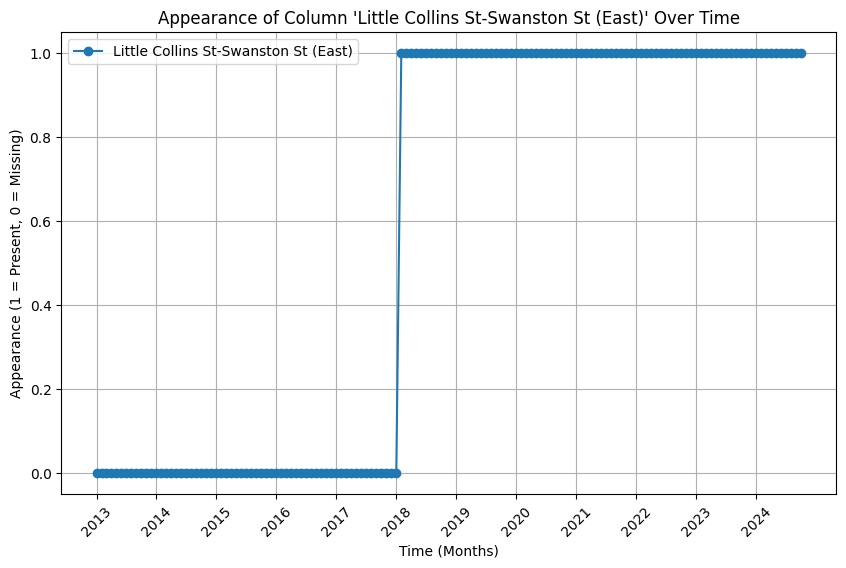

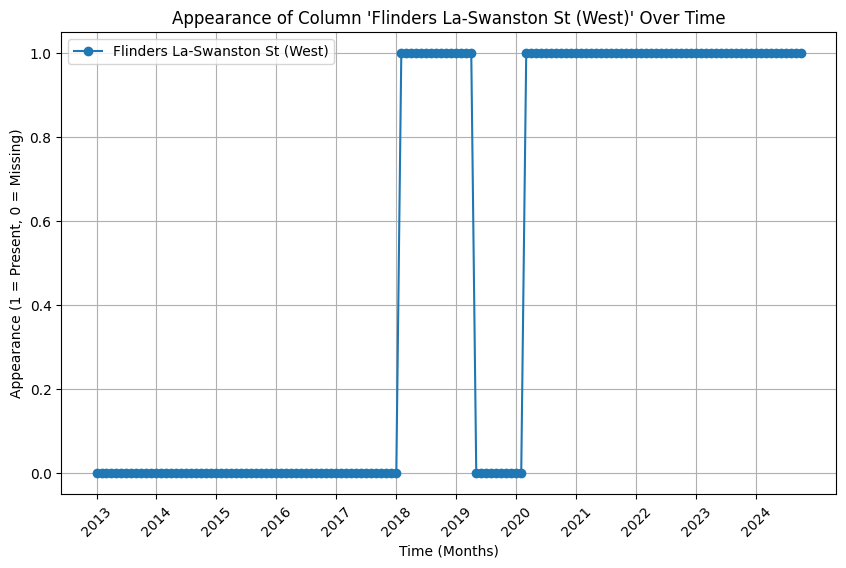

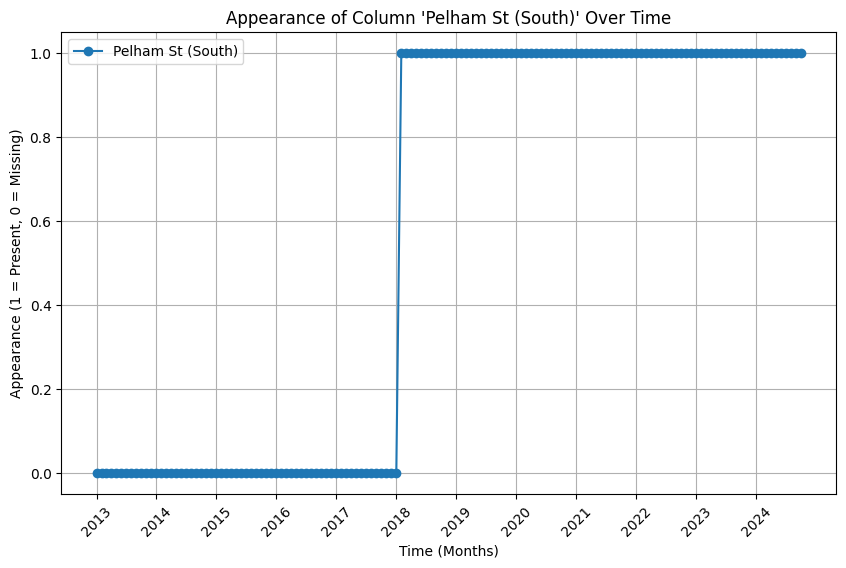

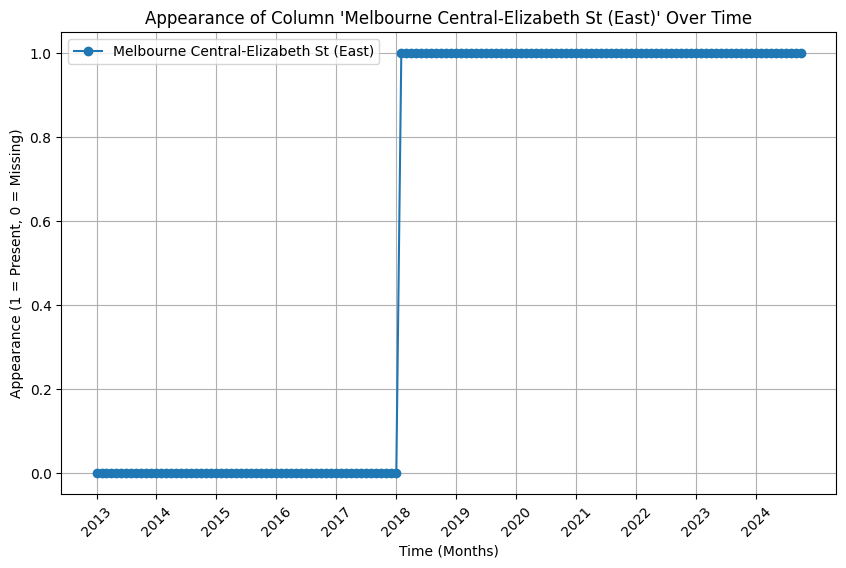

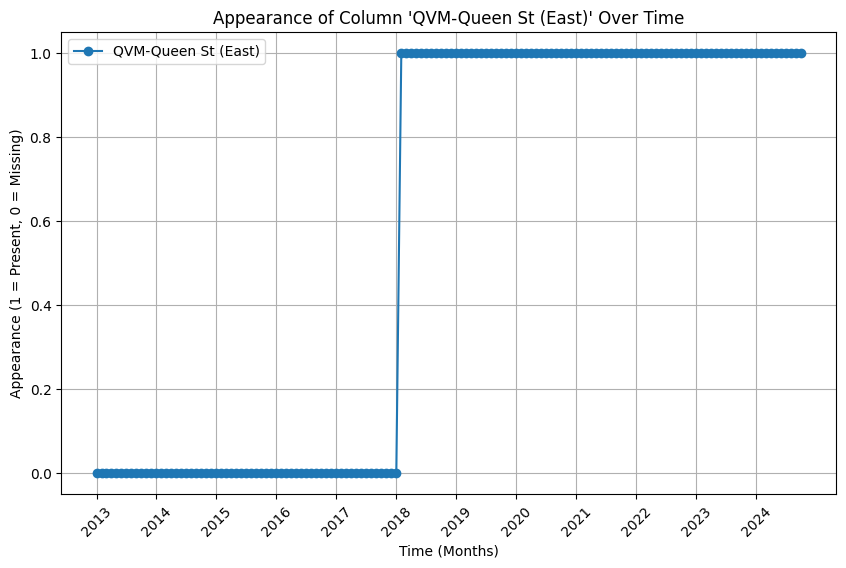

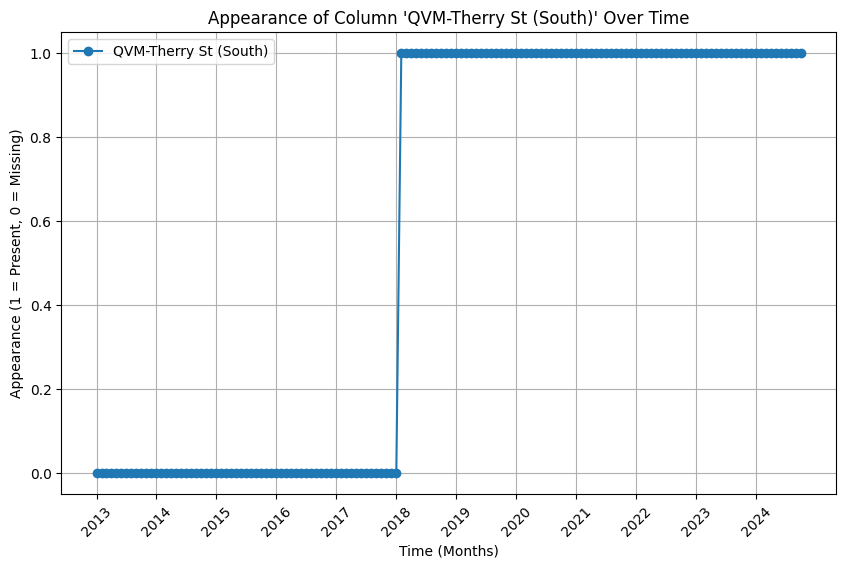

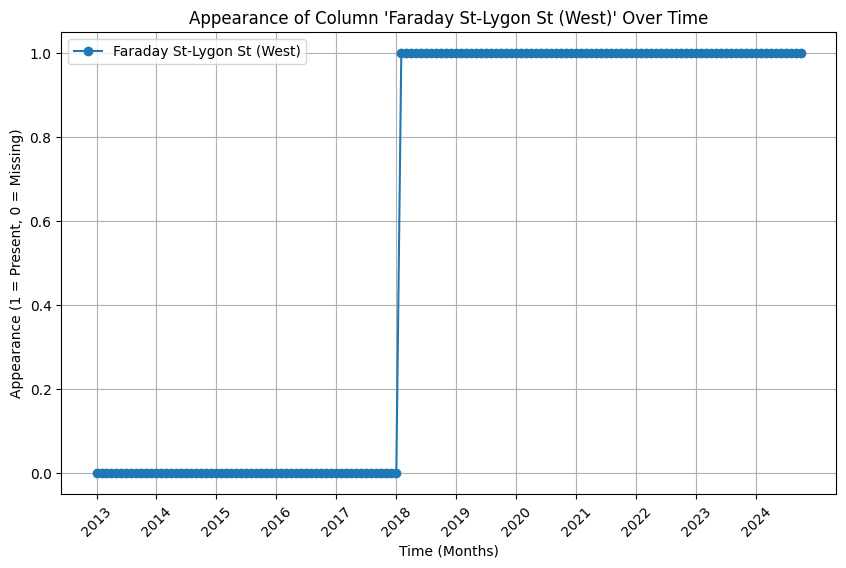

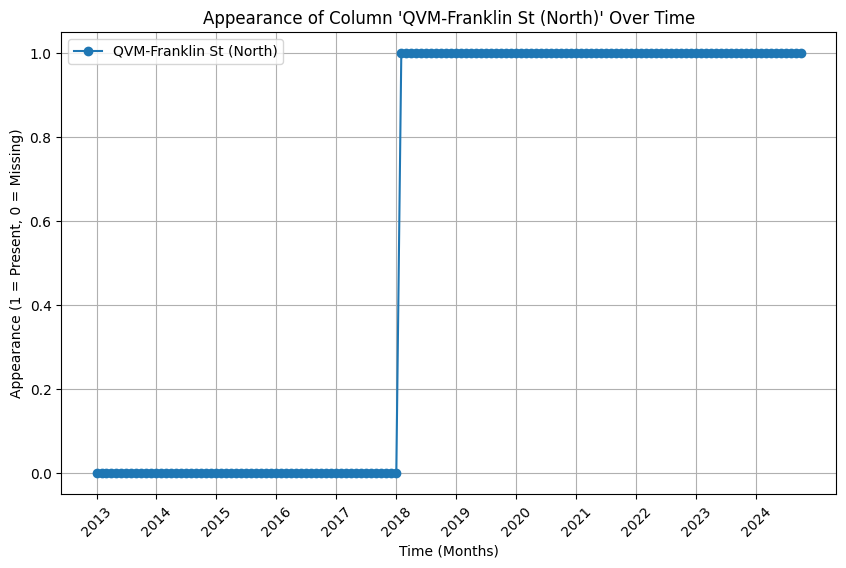

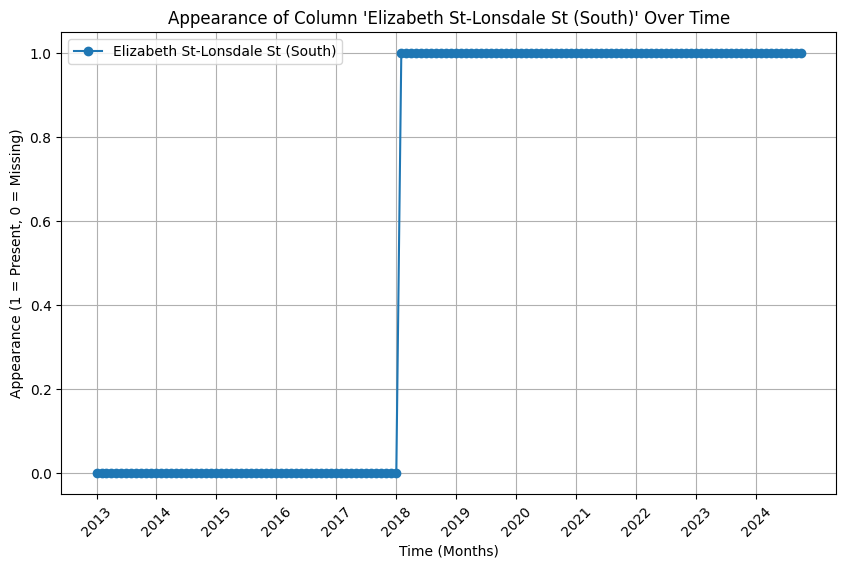

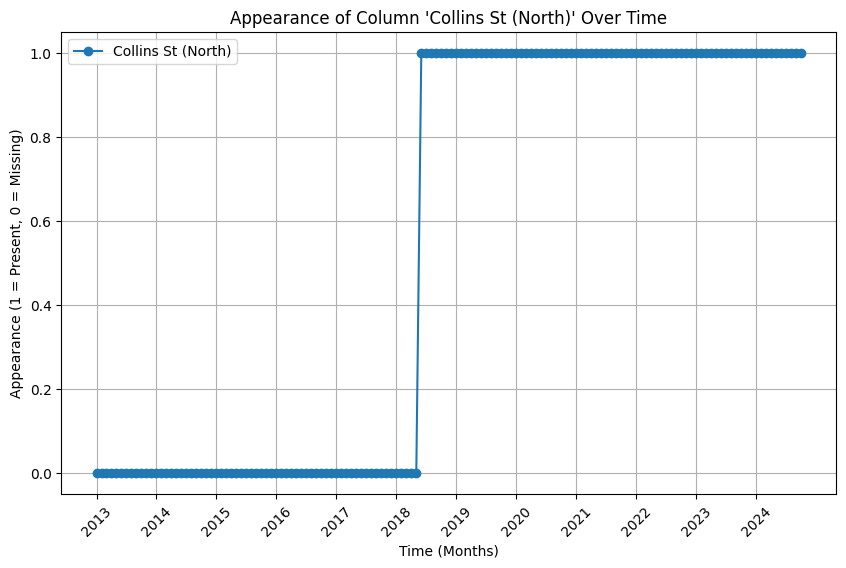

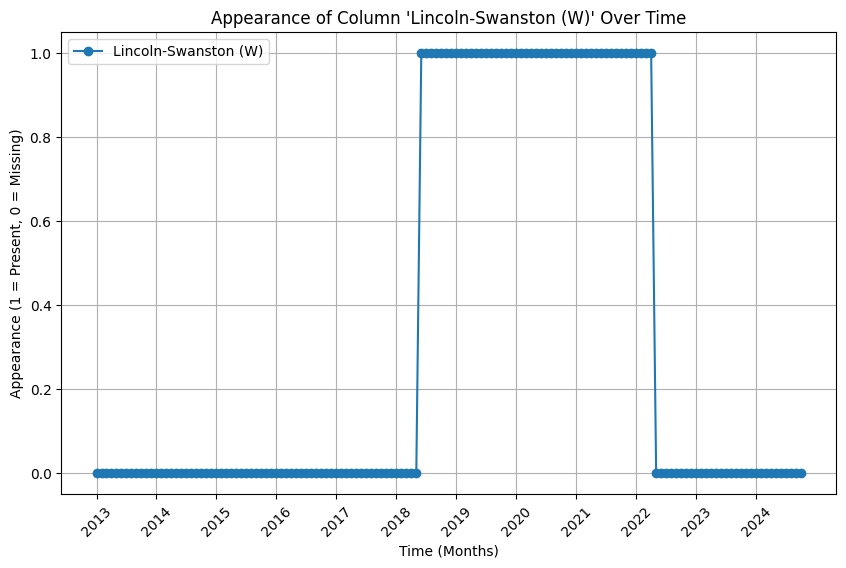

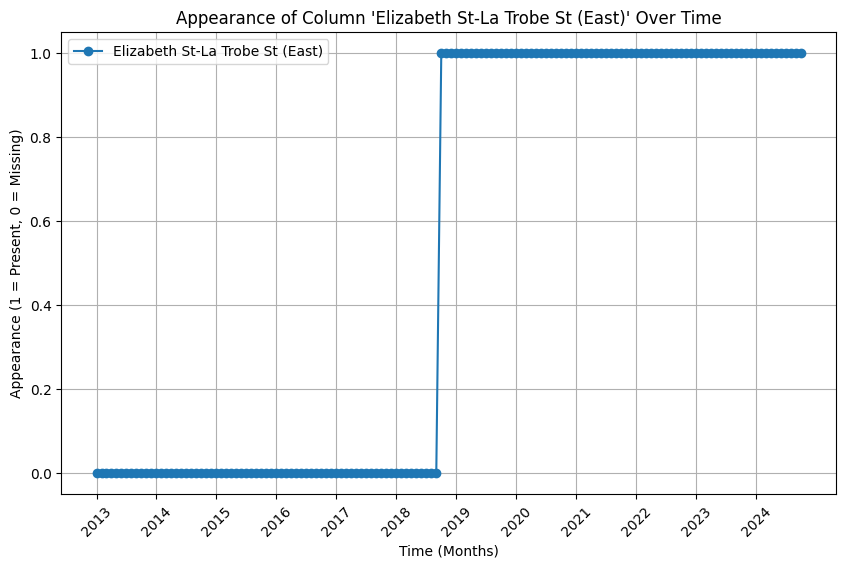

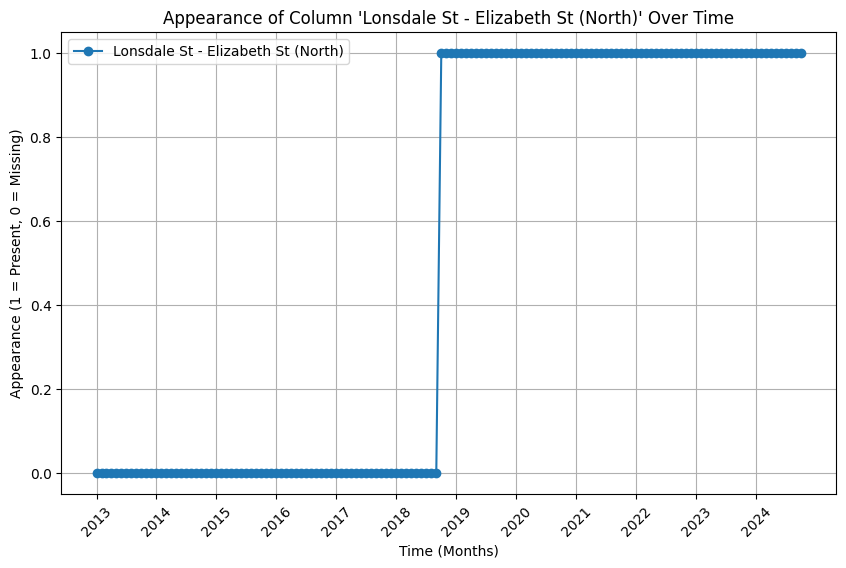

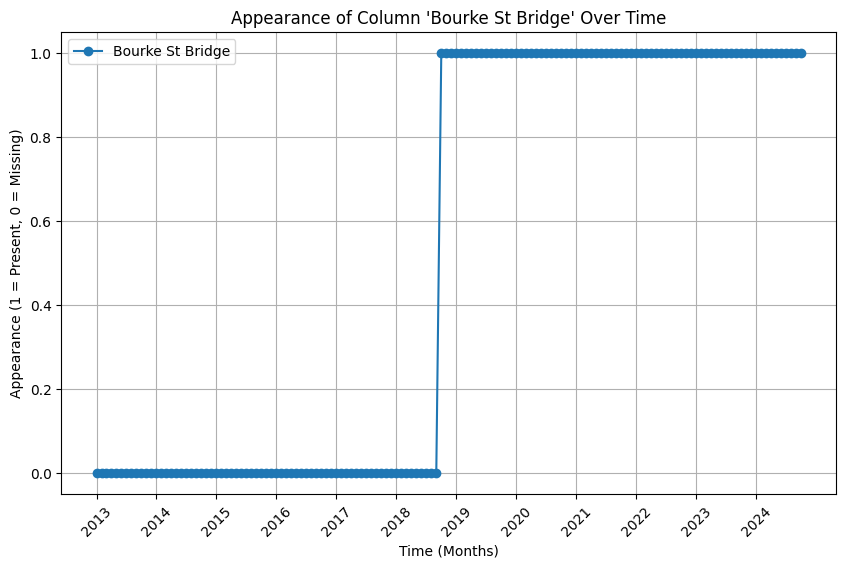

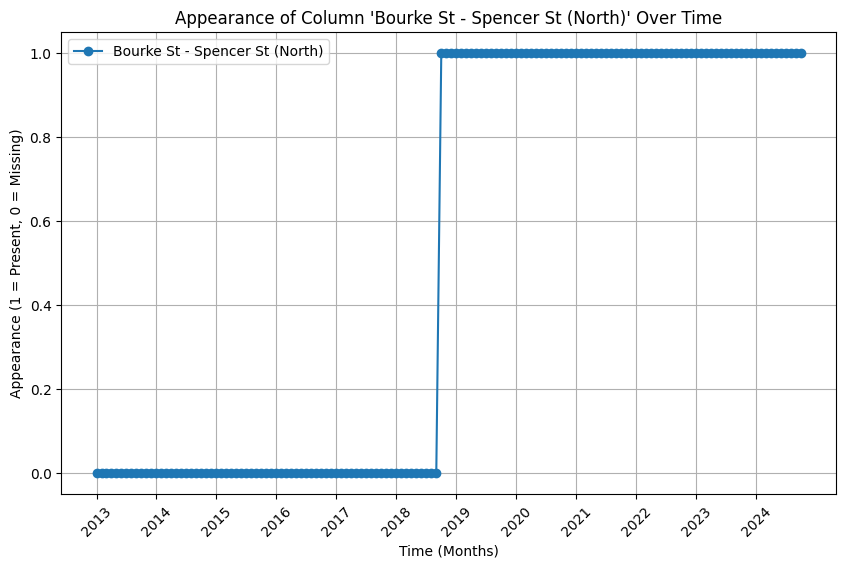

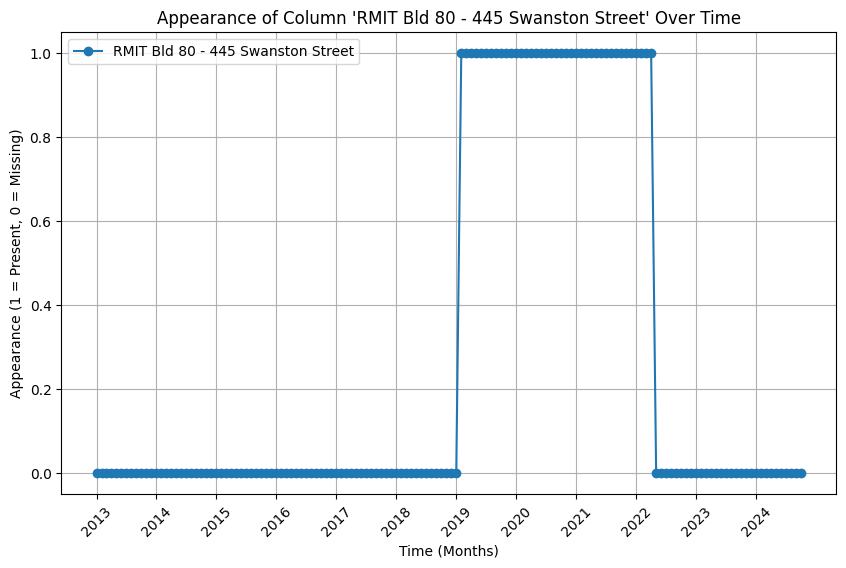

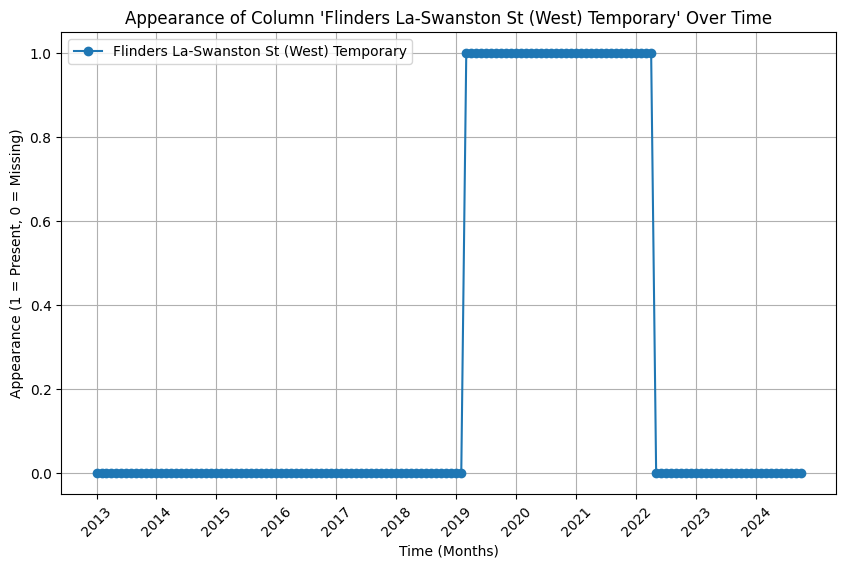

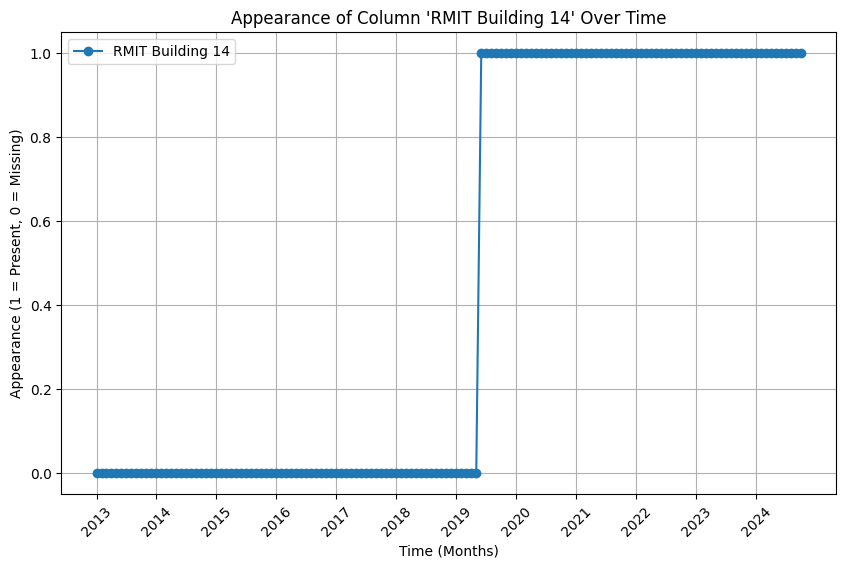

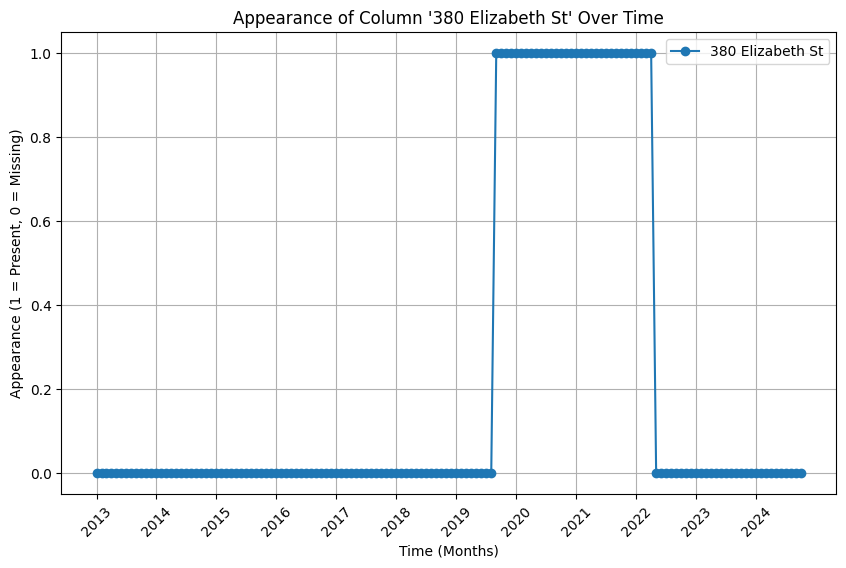

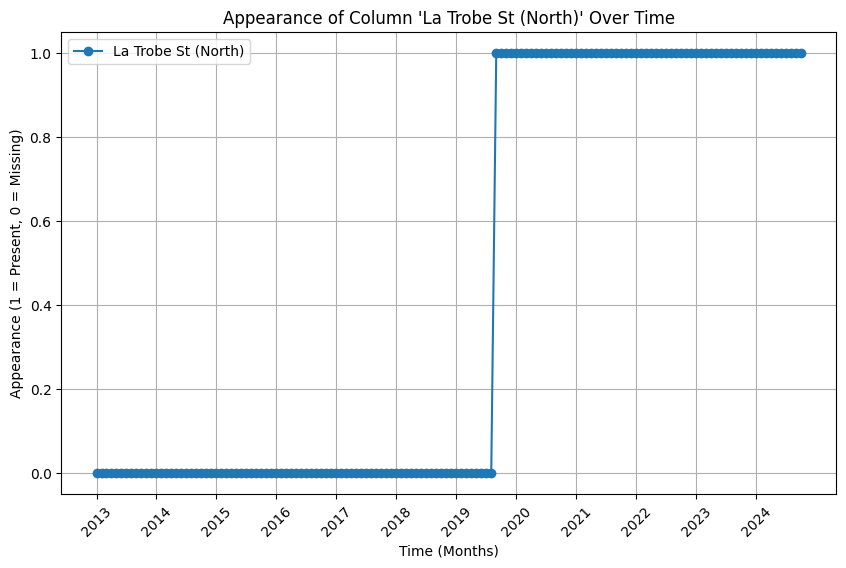

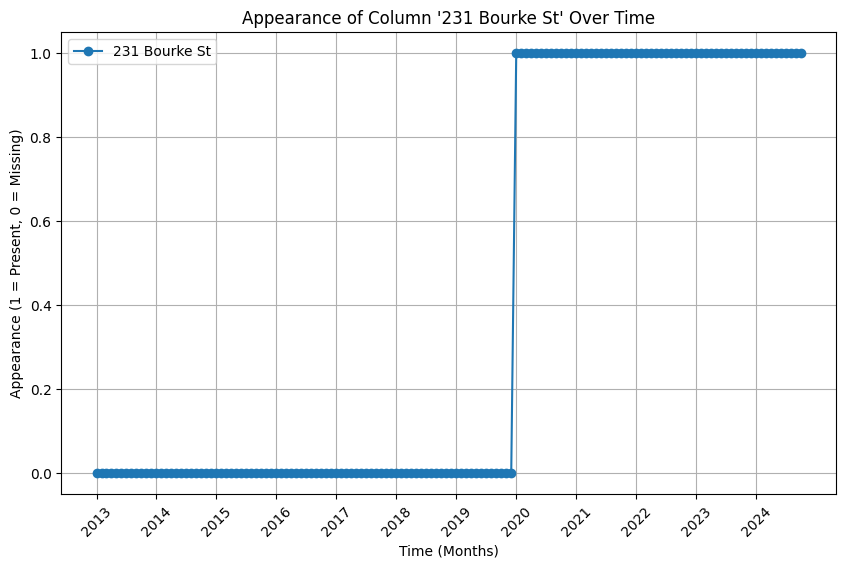

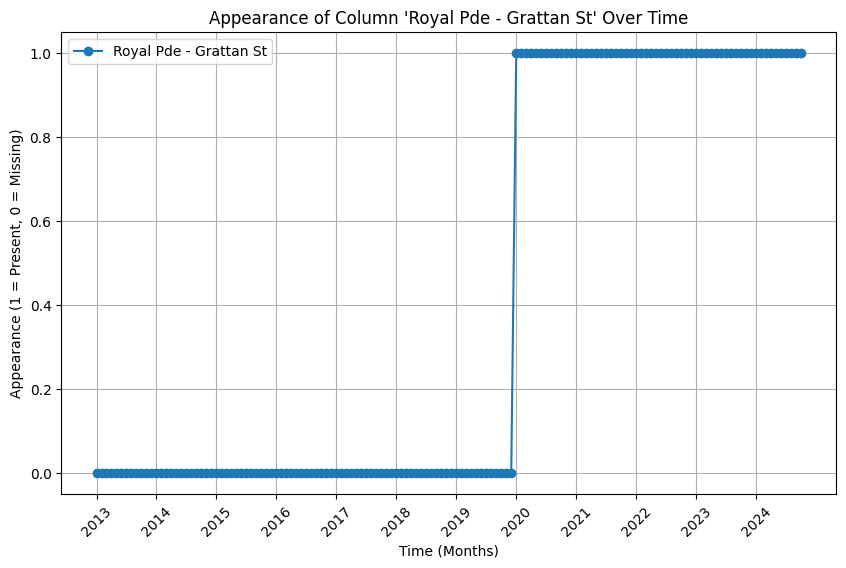

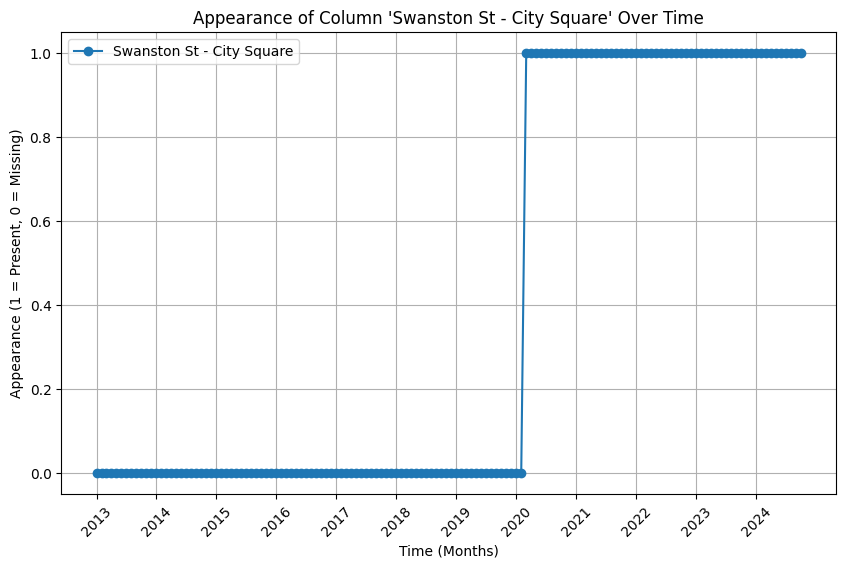

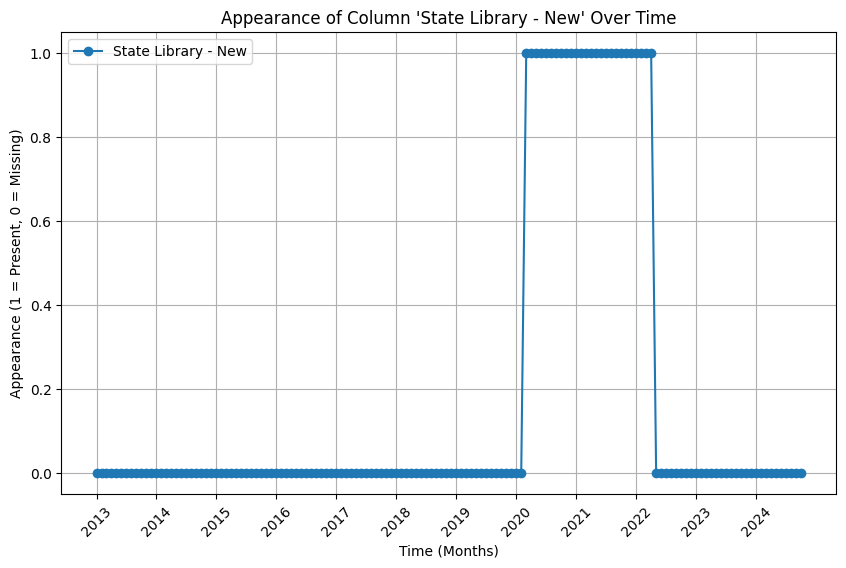

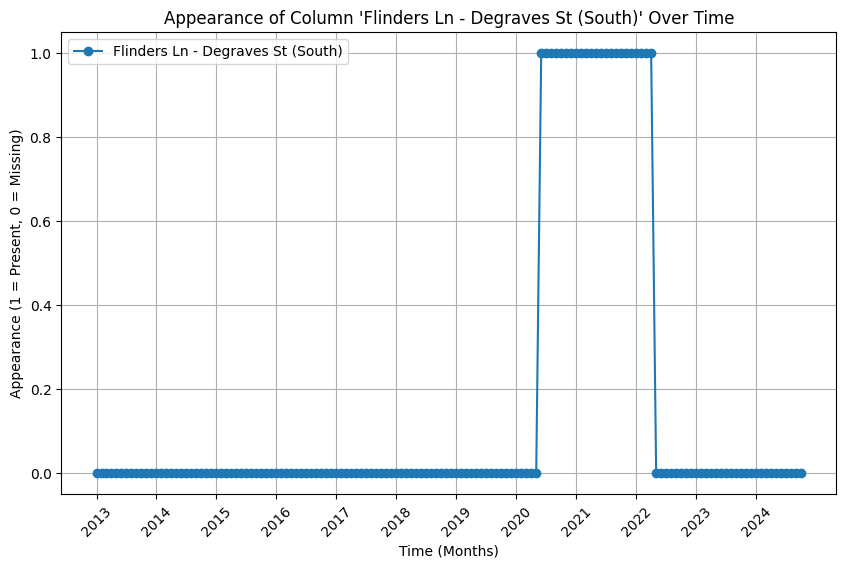

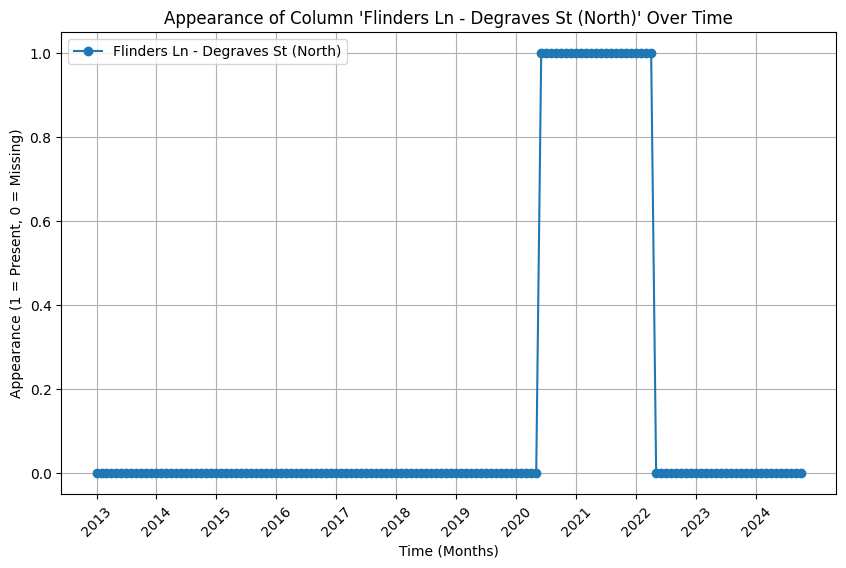

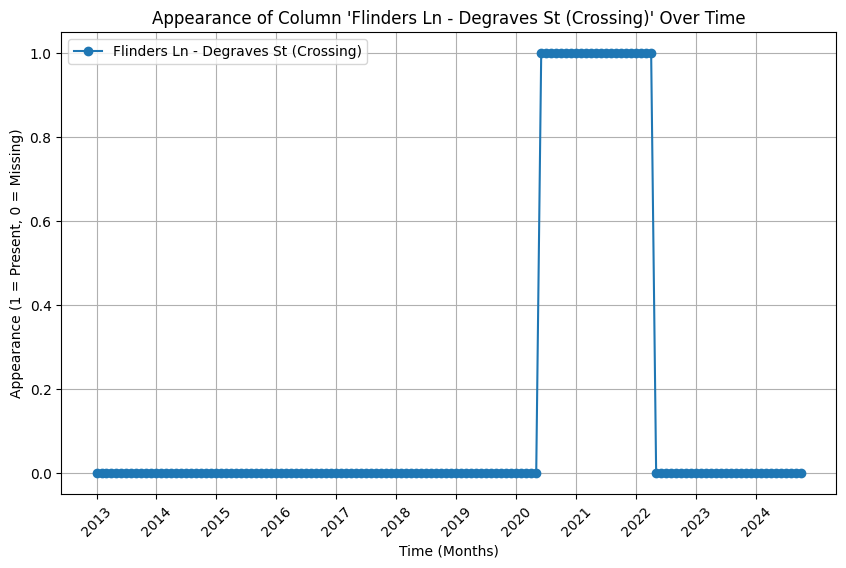

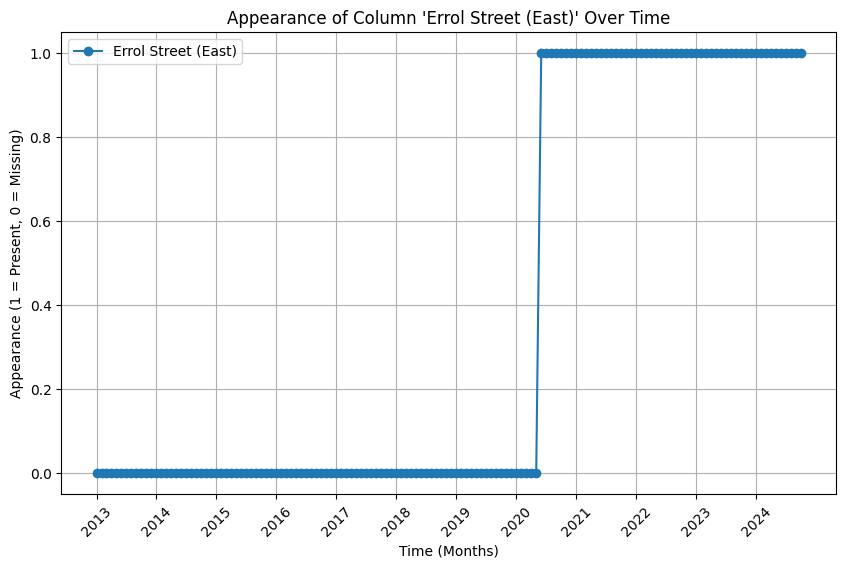

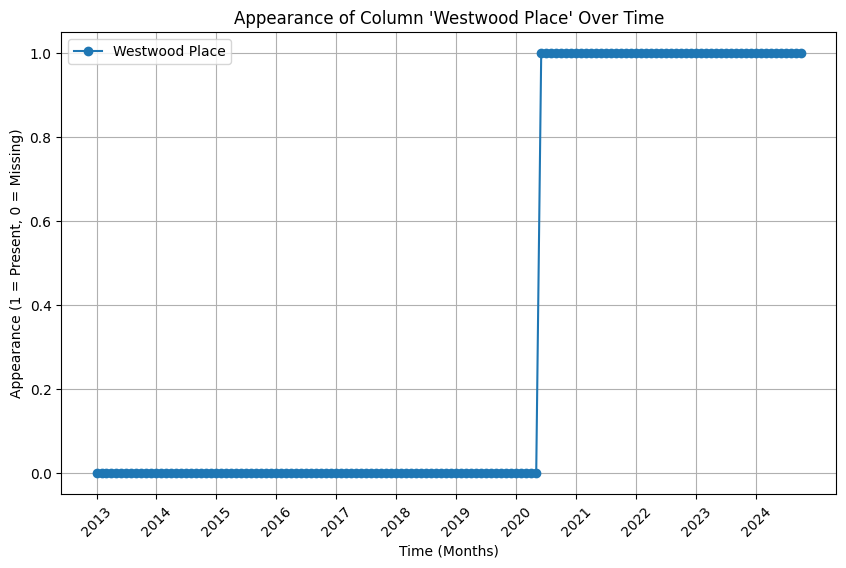

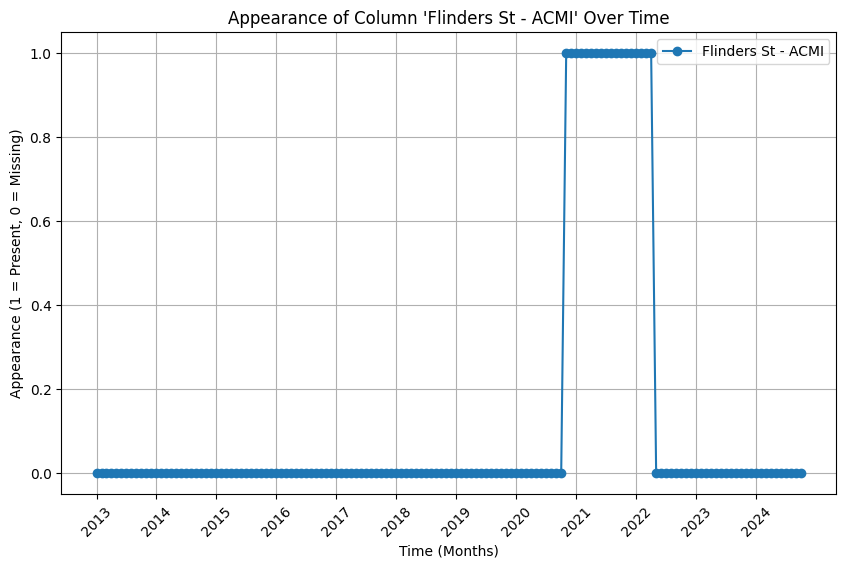

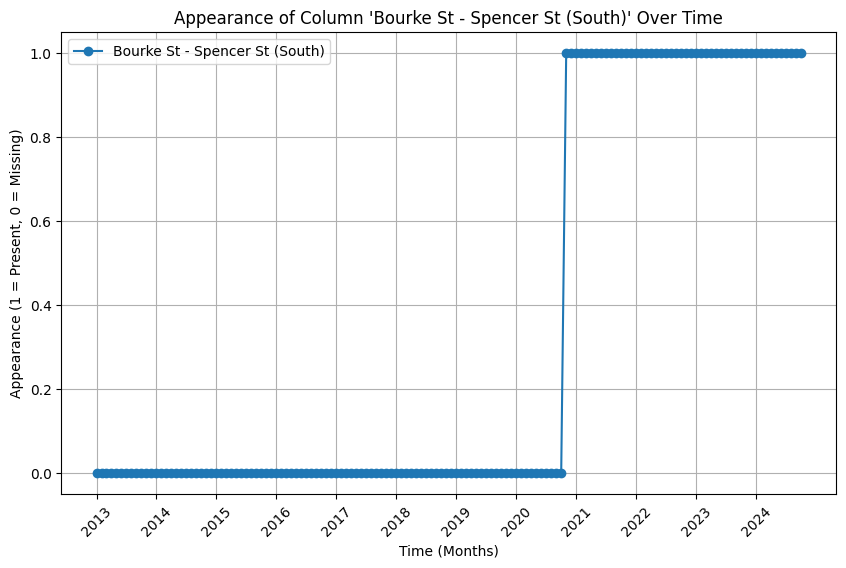

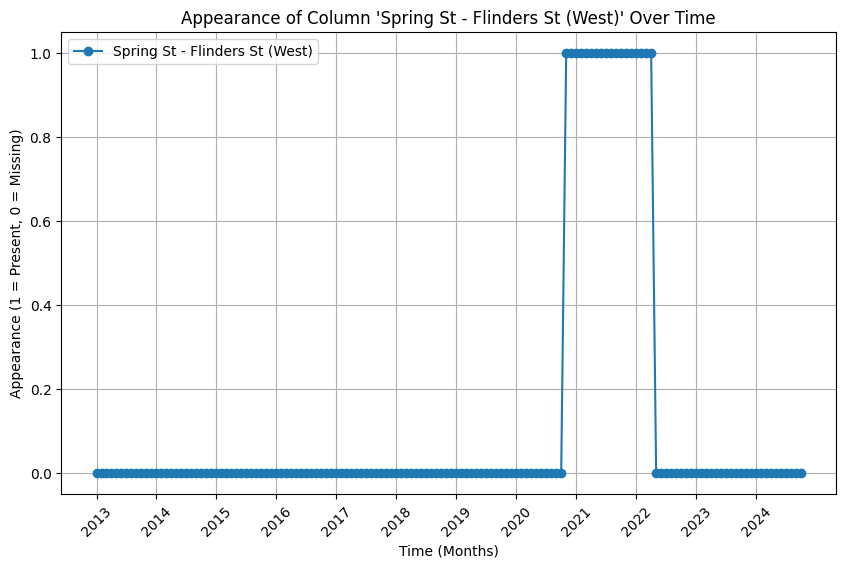

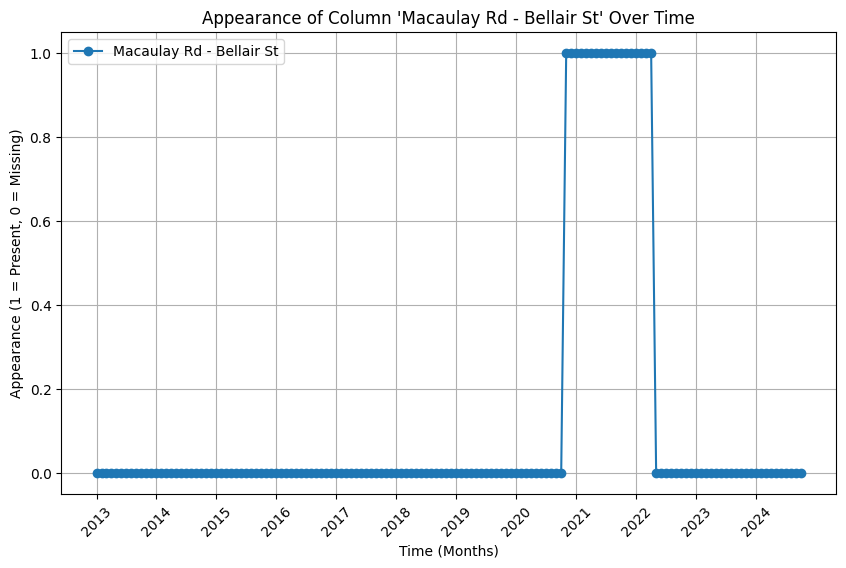

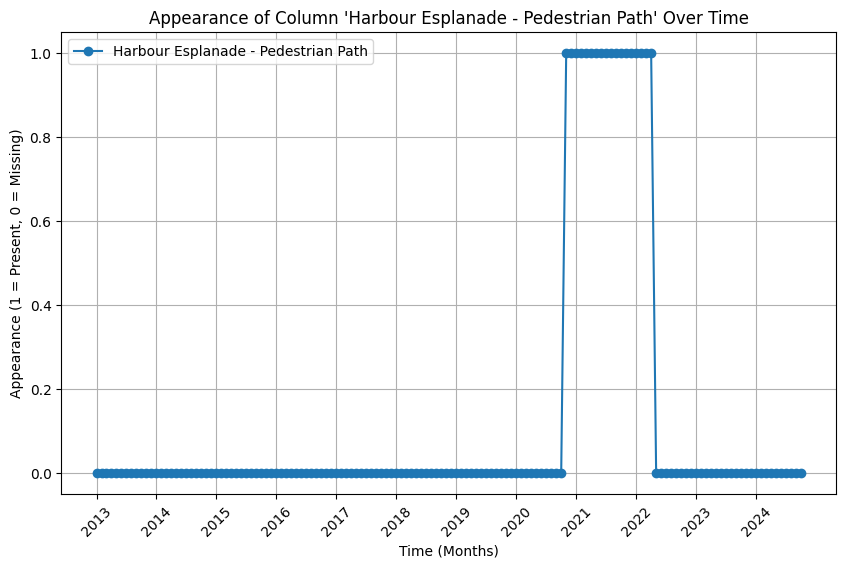

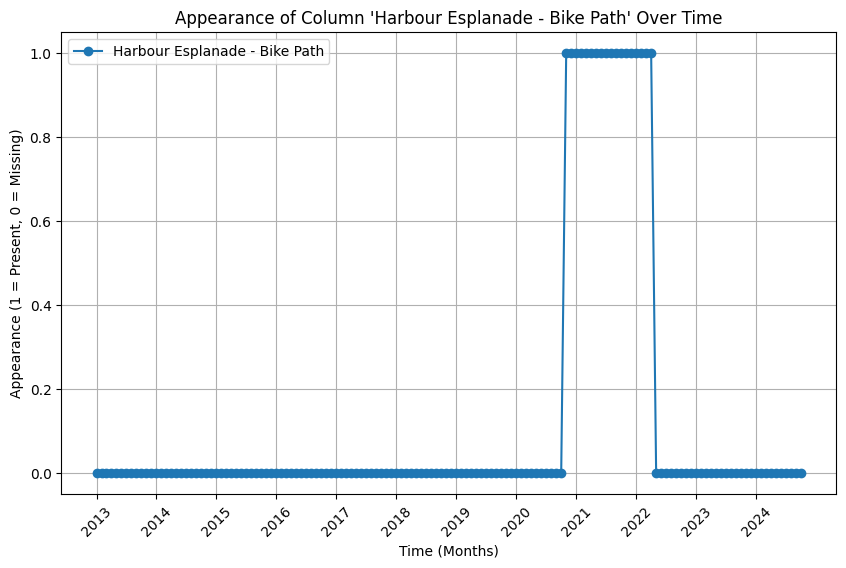

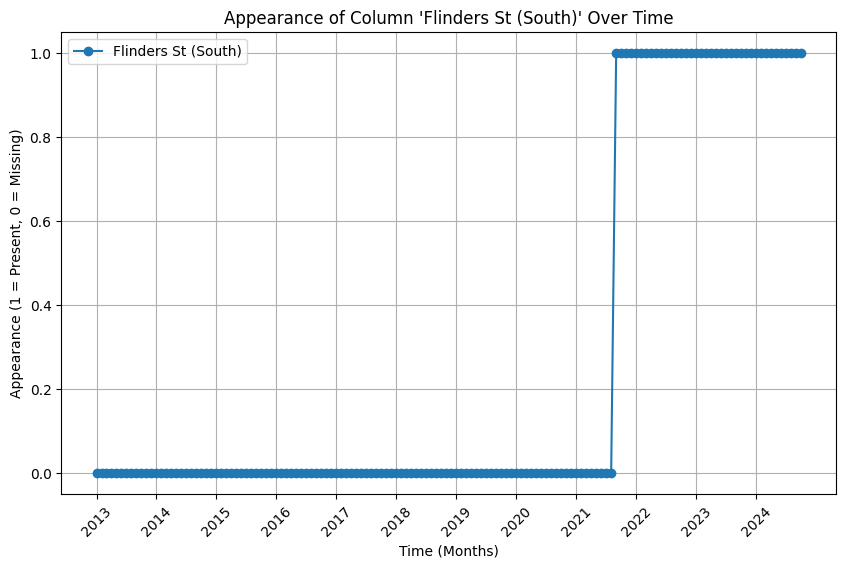

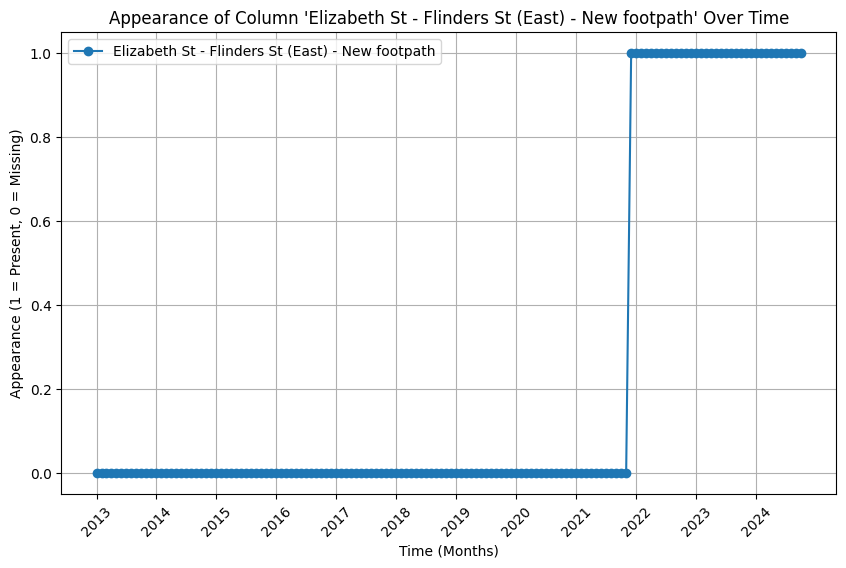

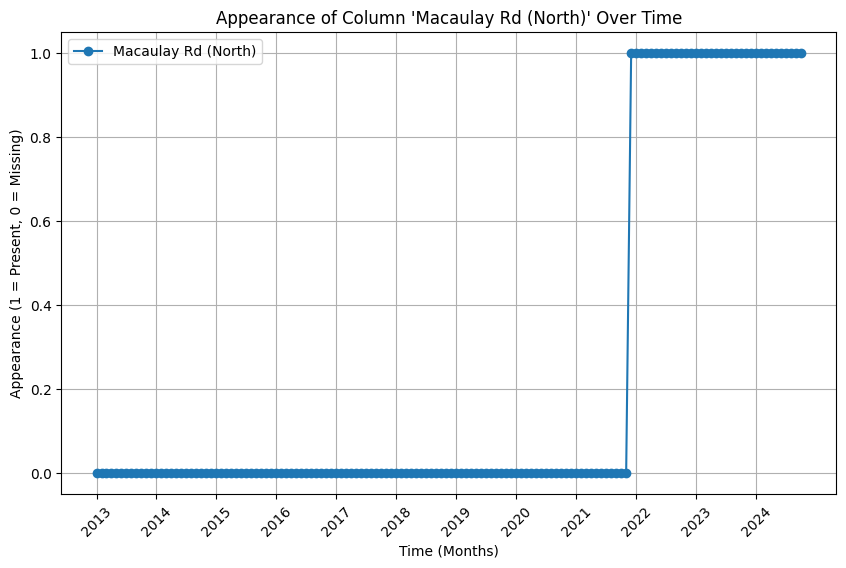

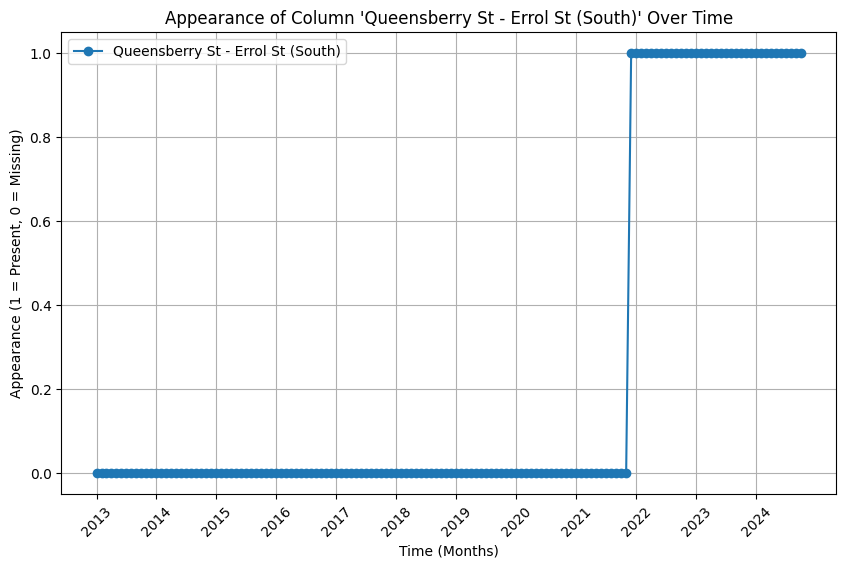

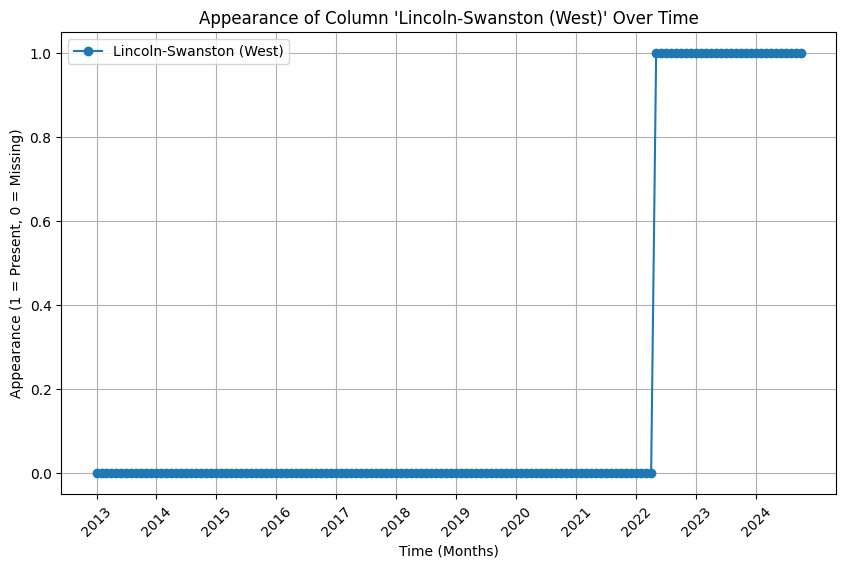

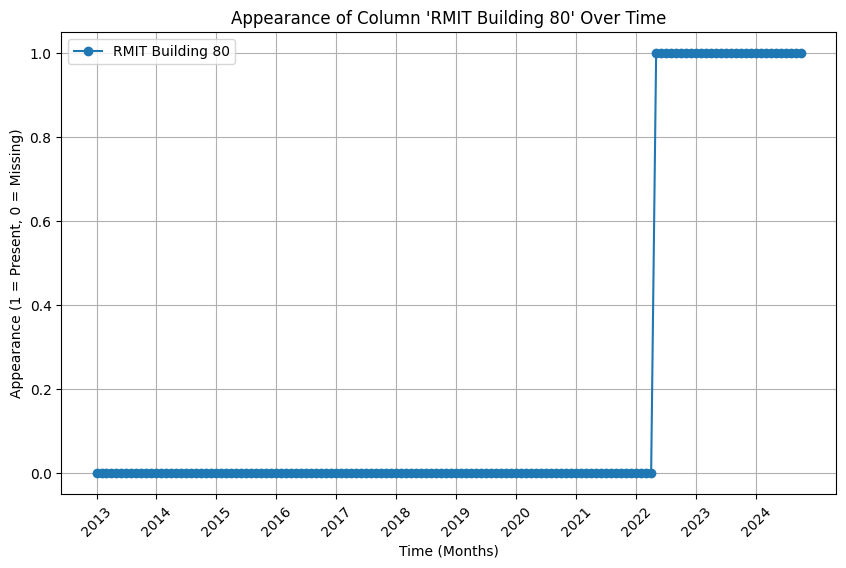

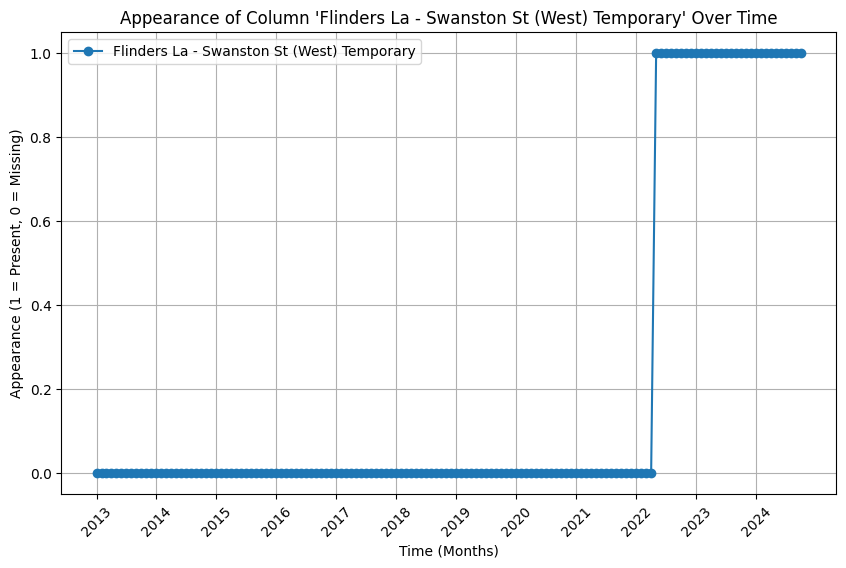

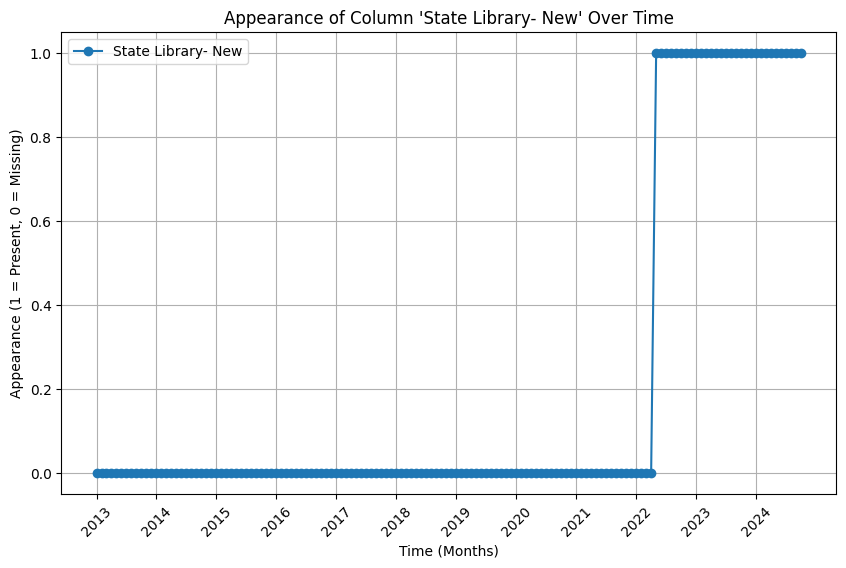

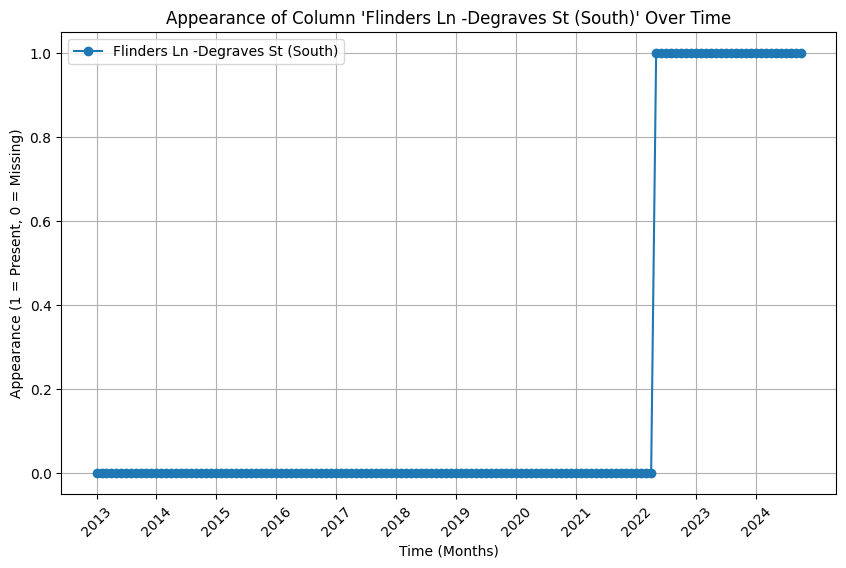

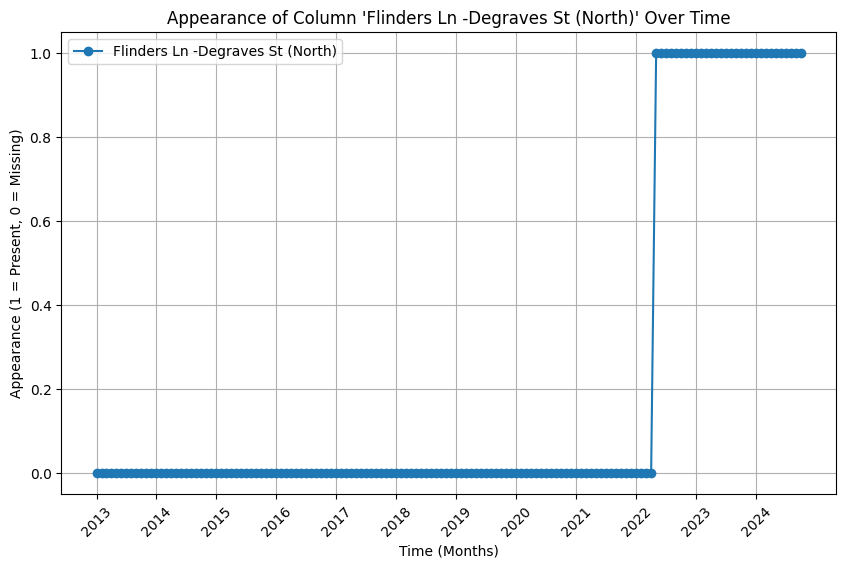

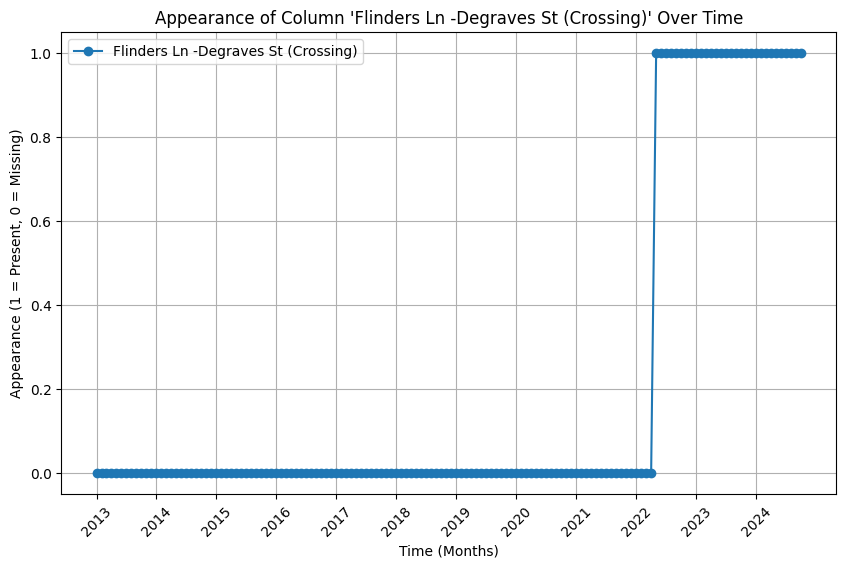

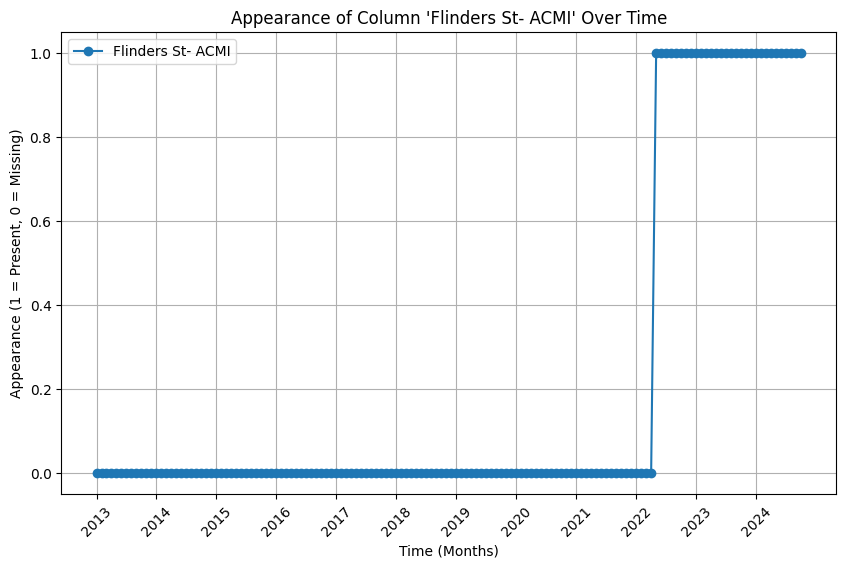

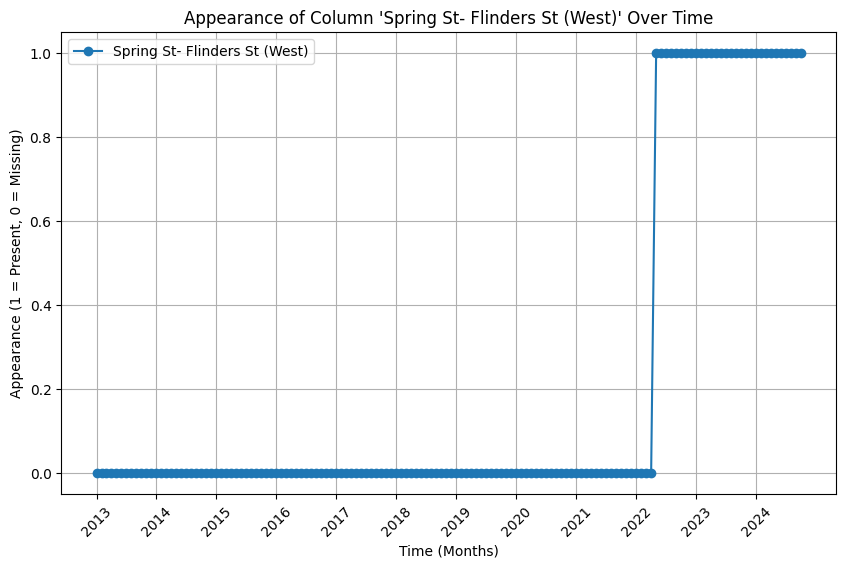

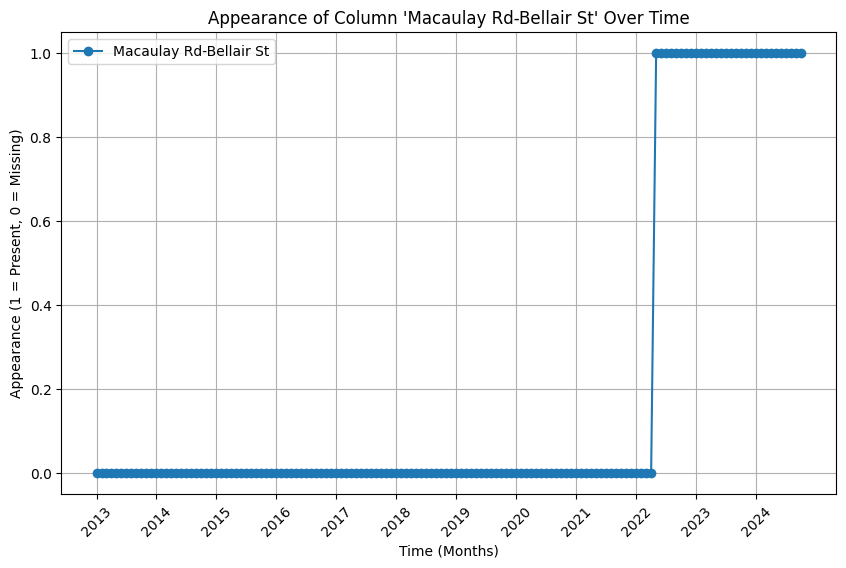

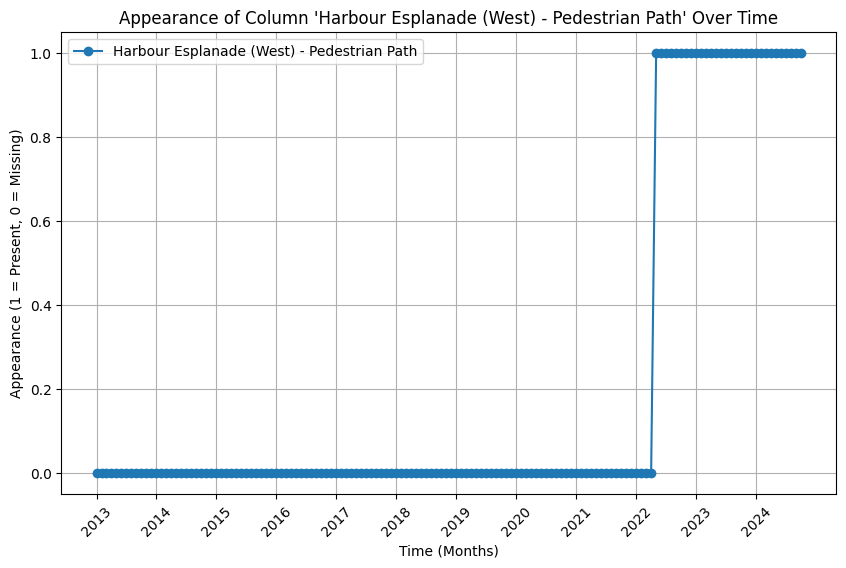

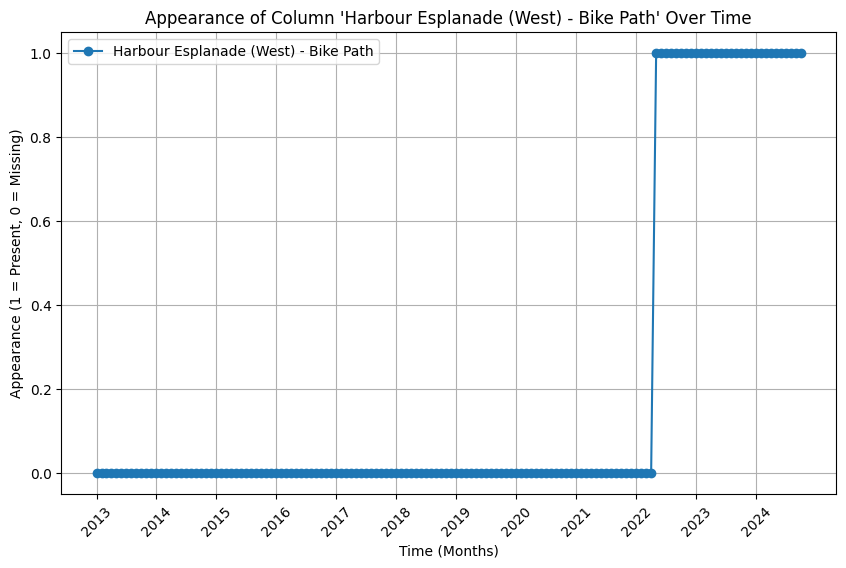

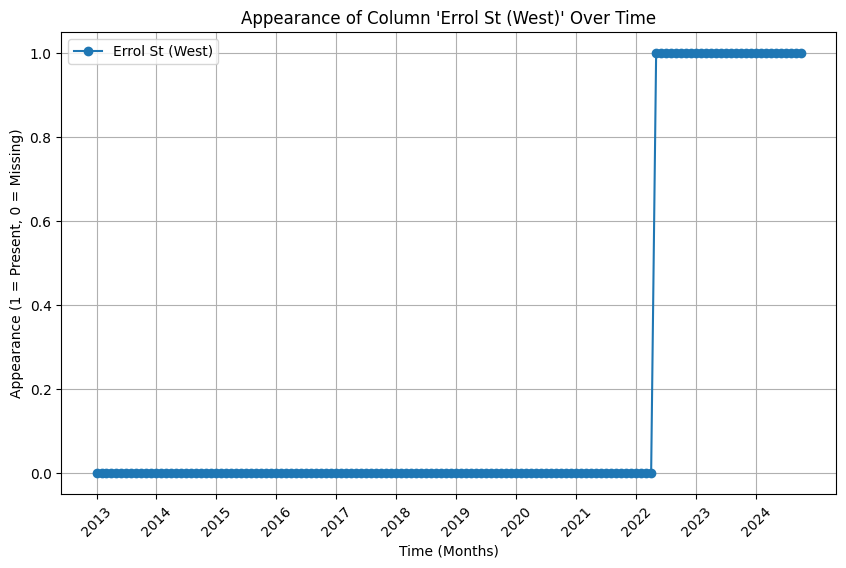

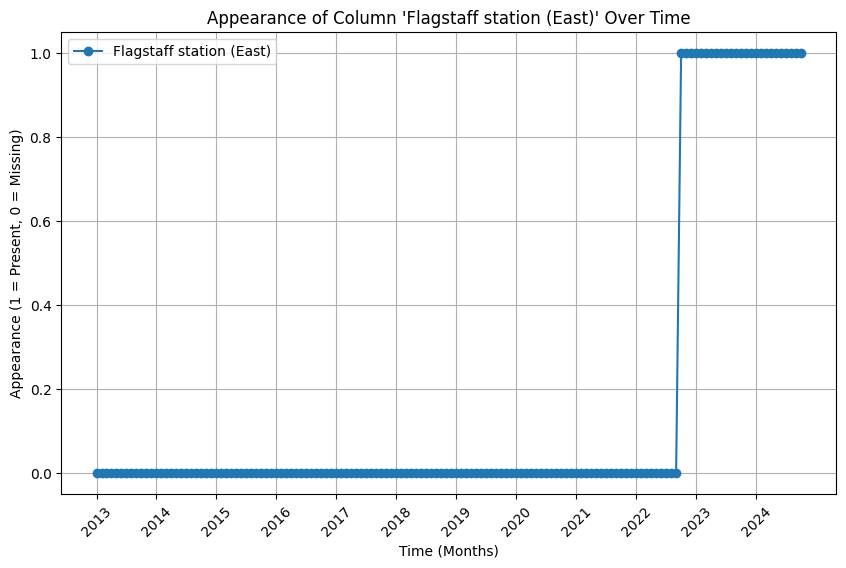

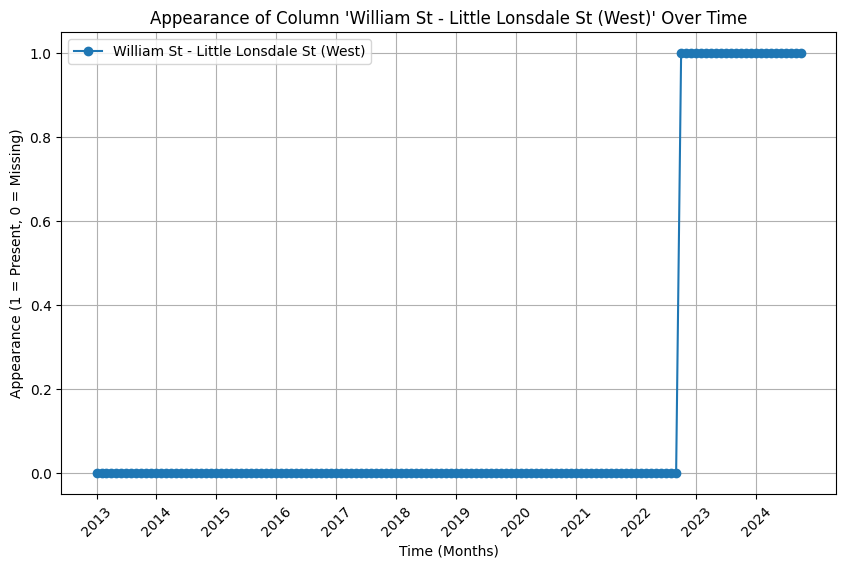

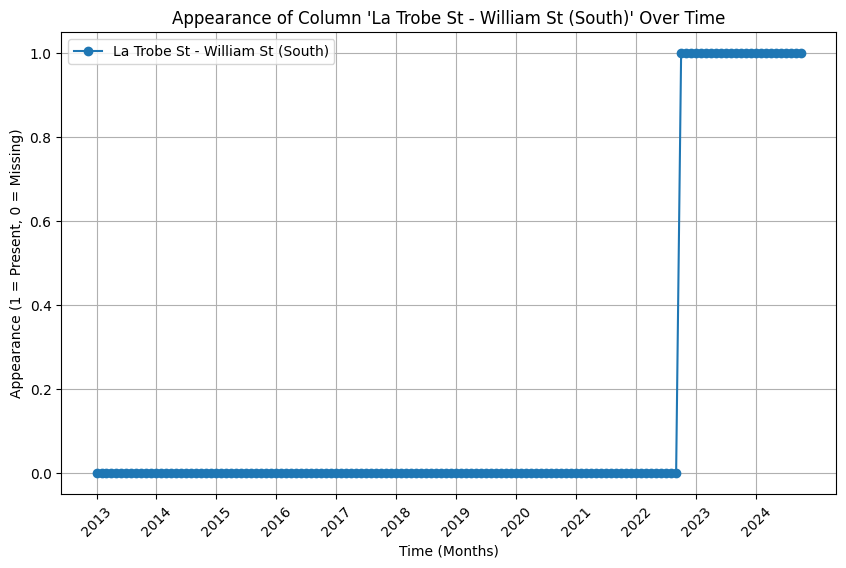

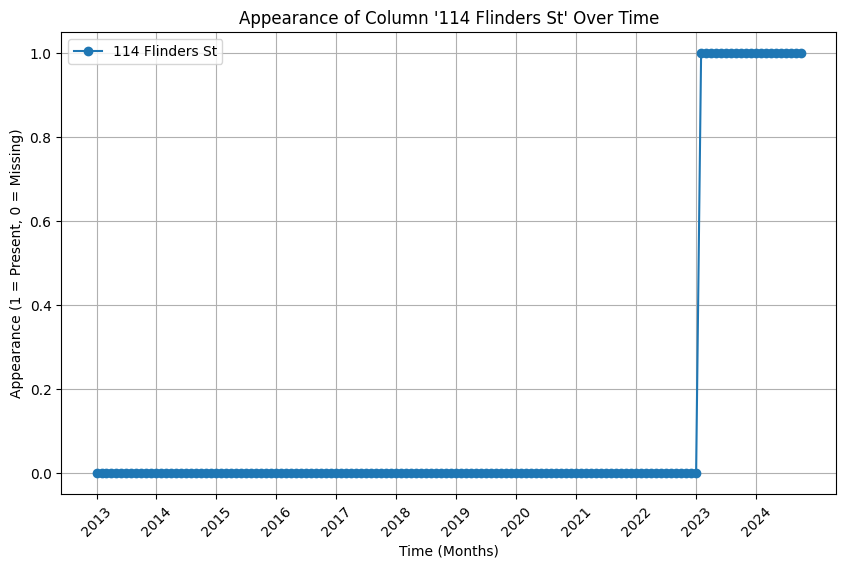

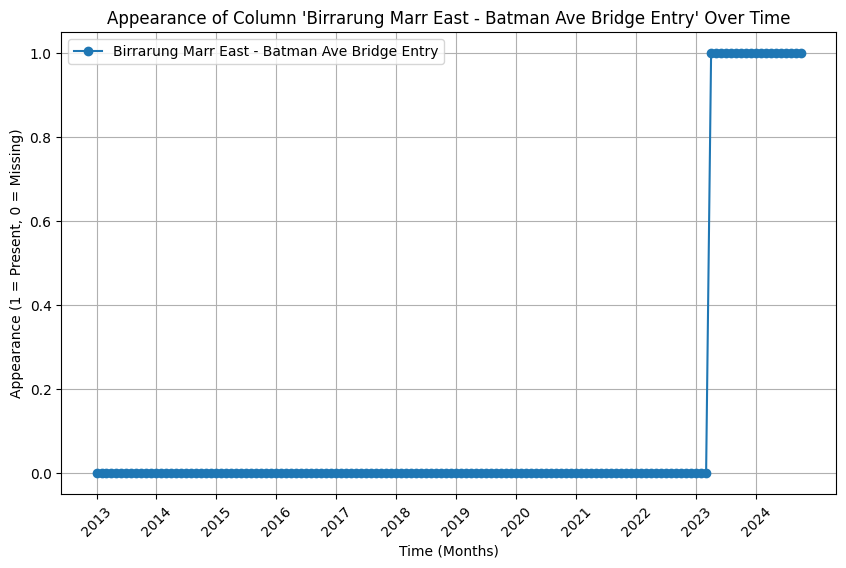

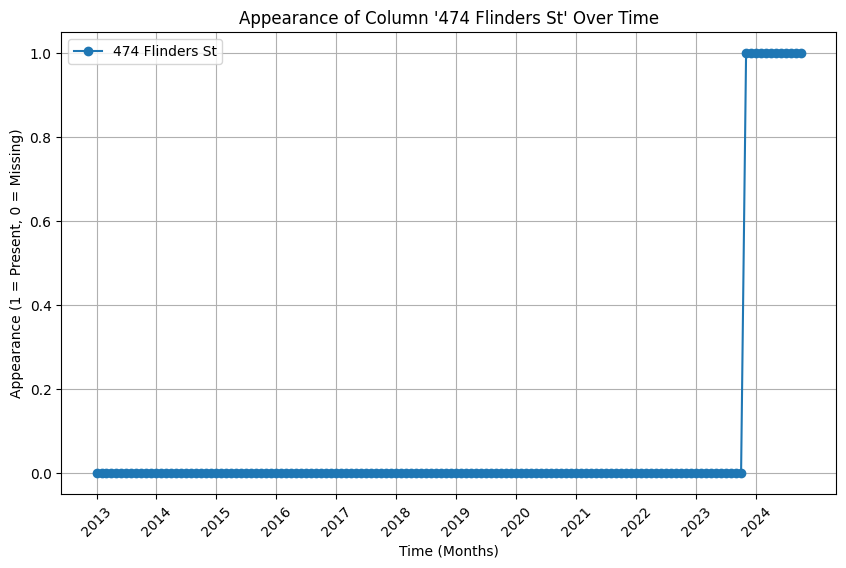

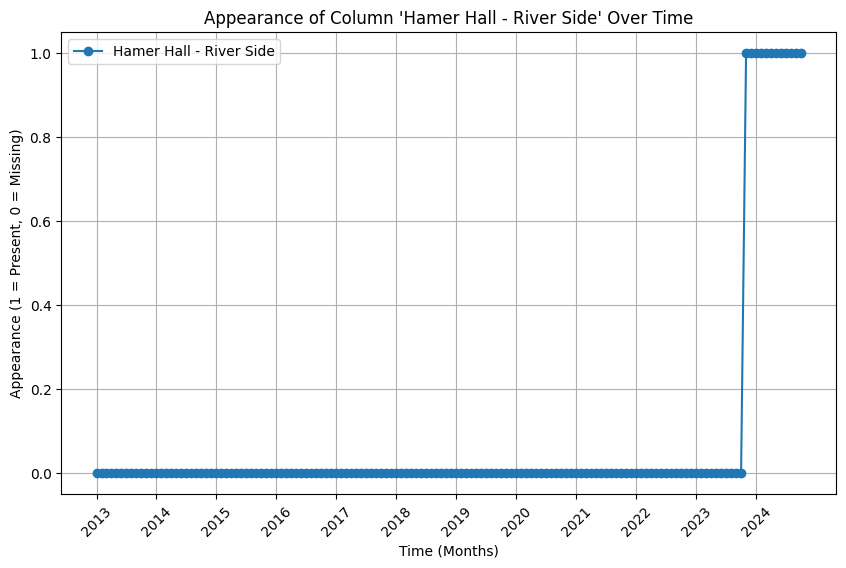

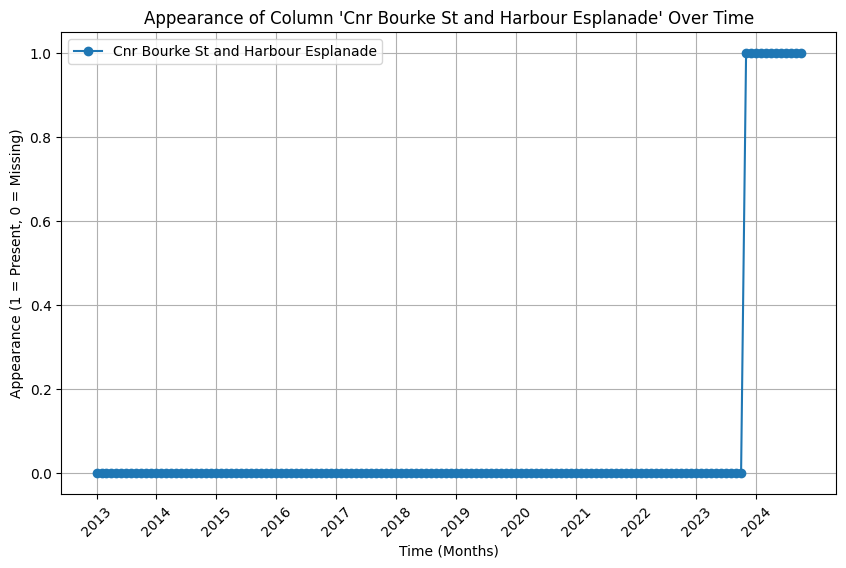

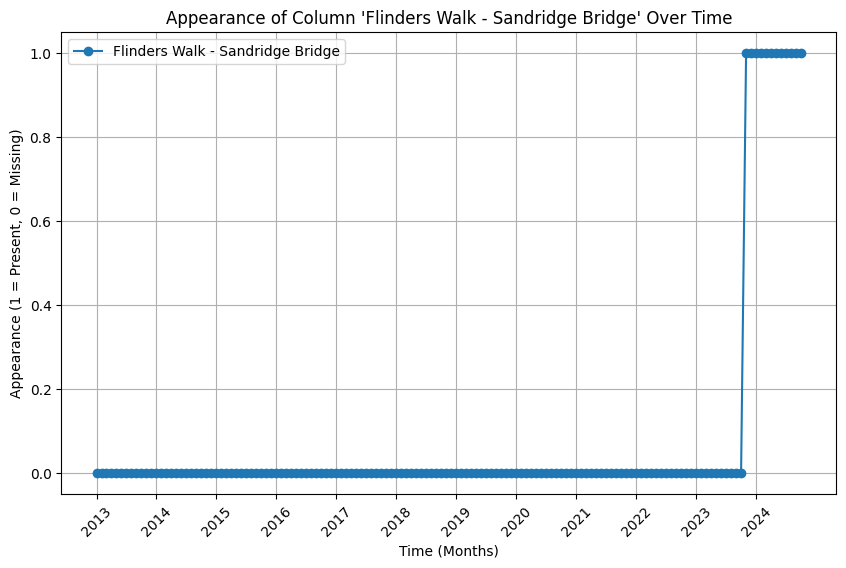

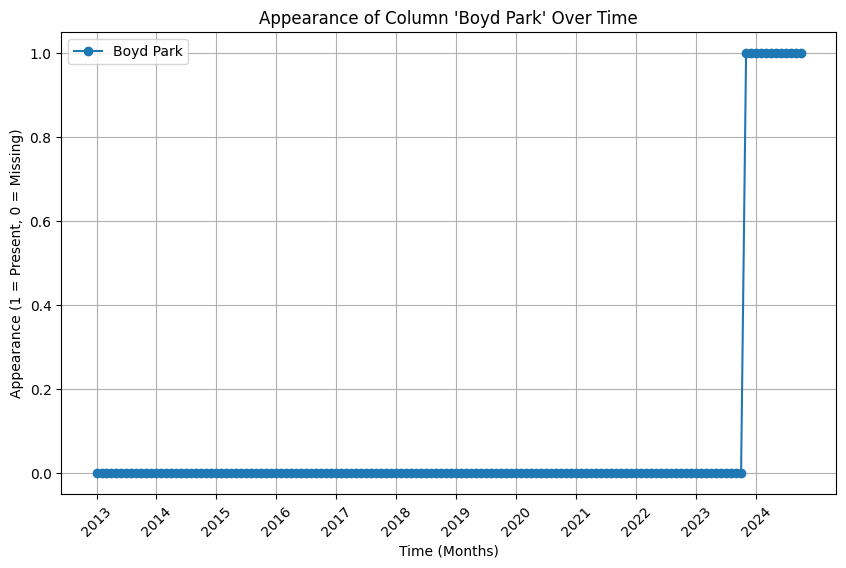

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt


# Initialize dictionaries to store column appearance and missing data counts
column_appearance_count = {}
missing_data_per_year = {}

# Process datasets year by year
for year in years:
    yearly_missing_total = 0
    for month in months:
        filename = f'{month}_{year}.csv'
        file_path = os.path.join(data_folder, filename)
        if os.path.exists(file_path):
            try:
                # Load dataset
                df = pd.read_csv(file_path)
                
                # Count appearances for each column
                for col in df.columns:
                    column_appearance_count[col] = column_appearance_count.get(col, 0) + 1
                
                # Calculate missing data for the year
                yearly_missing_total += df.isna().sum().sum()
            except Exception as e:
                print(f"Error loading {filename}: {e}")
    
    # Store total missing data for the year
    missing_data_per_year[year] = yearly_missing_total

# Create a DataFrame for missing data per year
missing_data_summary_df = pd.DataFrame({
    "Year": list(missing_data_per_year.keys()),
    "Total Missing Data": list(missing_data_per_year.values())
})

# Display the summary

# Filter columns based on minimum appearance
min_appearance = 12
filtered_columns = [col for col, count in column_appearance_count.items() if count >= min_appearance]

# Plot the appearance of filtered columns over time
appearance_over_time = {col: [] for col in filtered_columns}
for year in years:
    for month in months:
        filename = f'{month}_{year}.csv'
        file_path = os.path.join(data_folder, filename)
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                for col in filtered_columns:
                    appearance_over_time[col].append(1 if col in df.columns else 0)
            except Exception as e:
                print(f"Error loading {filename}: {e}")

# Plot column appearance over time for each filtered column
for col, appearance in appearance_over_time.items():
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(appearance)), appearance, marker='o', linestyle='-', label=col)
    plt.title(f"Appearance of Column '{col}' Over Time")
    plt.xlabel("Time (Months)")
    plt.ylabel("Appearance (1 = Present, 0 = Missing)")
    plt.xticks(ticks=range(0, len(appearance), 12), labels=years, rotation=45)
    plt.grid()
    plt.legend()
    plt.show()
